## Forecast Analysis Visualization

### 1. Load the Realtime Data

In [1]:
# Import necessary modules and the postprocessing library

import sys
import pandas as pd
sys.path.append("../../../")
import glob
import json 
from natsort import natsorted


from postprocessinglib.evaluation import data, metrics, visuals
from postprocessinglib.utilities import _helper_functions as hlp
from postprocessinglib.forecast import forecast

 The list of stations can be extraxted from the json file that contains the station information, including its latitude, longitude and its identification nummber amongst other things.

In [29]:
## json_file = '../../../postprocessinglib/forecast/available_stations.json'
# Load the JSON file
with open(json_file, 'r') as f:
    dt = json.load(f)

# Extract station numbers
station_list = [feature['properties']['STATION_NUMBER'] for feature in dt['features']]

# Print or use the list
print(station_list)

['05AA024', '05AC003', '05AD007', '05AG006', '05AJ001', '05BB001', '05BG010', '05BH004', '05BL024', '05BN012', '05CA009', '05CB001', '05CC002', '05CE001', '05CK004', '05DB006', '05DC001', '05DF001', '05EF001', '05FA001', '05FE004', '05GG001', '05HD039', '05HG001', '05KD003', '05KJ001']


Using the MESH-Scripts_pylib LIbrary, we are able to obtain the real-time data from "https://api.weather.gc.ca/". This Library should already be installed in your conda environment if you followed the steps from the documentation page.

In [3]:
from datetime import datetime, timezone
from dateutil.relativedelta import relativedelta
from GeneralProcessing.gen_streamflow_file import GenStreamflowFile
gen_flow = GenStreamflowFile()


end_dt = datetime.now(timezone.utc).replace(microsecond=0) # Get the time today, right now as the end date.
start_dt = end_dt - relativedelta(months=1) # set the start date to a be a month into the past i.e., past 1 month data
start = start_dt.strftime("%Y-%m-%dT%H:%M:%SZ")
end   = end_dt.strftime("%Y-%m-%dT%H:%M:%SZ")
df_rt, meta_rt = gen_flow.fetch_hydrometric_realtime_full_range(
    station_numbers=station_list, 
    start=start, end=end,
    window_days=1, freq_hours=12
)

Window 2025-06-30–2025-07-01 in 4.5s
Window 2025-07-01–2025-07-02 in 4.6s
Window 2025-07-02–2025-07-03 in 4.8s
Window 2025-07-03–2025-07-04 in 4.8s
Window 2025-07-04–2025-07-05 in 4.8s
Window 2025-07-05–2025-07-06 in 4.6s
Window 2025-07-06–2025-07-07 in 4.8s
Window 2025-07-07–2025-07-08 in 4.6s
Window 2025-07-08–2025-07-09 in 4.7s
Window 2025-07-09–2025-07-10 in 4.8s
Window 2025-07-10–2025-07-11 in 4.8s
Window 2025-07-11–2025-07-12 in 4.7s
Window 2025-07-12–2025-07-13 in 4.8s
Window 2025-07-13–2025-07-14 in 4.7s
Window 2025-07-14–2025-07-15 in 4.9s
Window 2025-07-15–2025-07-16 in 5.0s
Window 2025-07-16–2025-07-17 in 4.9s
Window 2025-07-17–2025-07-18 in 5.1s
Window 2025-07-18–2025-07-19 in 4.9s
Window 2025-07-19–2025-07-20 in 5.2s
Window 2025-07-20–2025-07-21 in 4.8s
Window 2025-07-21–2025-07-22 in 4.7s
Window 2025-07-22–2025-07-23 in 4.7s
Window 2025-07-23–2025-07-24 in 4.8s
Window 2025-07-24–2025-07-25 in 4.6s
Window 2025-07-25–2025-07-26 in 4.8s
Window 2025-07-26–2025-07-27 in 4.7s
W

C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{fre

In [4]:
df_rt

,05AA024,05AC003,05AD007,05AG006,05AJ001,05BB001,05BG010,05BH004,05BL024,05BN012,...,05DC001,05DF001,05EF001,05FA001,05FE004,05GG001,05HD039,05HG001,05KD003,05KJ001
DateTime,,,,,,,,,,,,,,,,,,,,,
2025-07-01 00:00:00+00:00,50.963333,1.777833,24.553333,27.746667,172.700000,79.891667,2.916500,141.050000,33.811667,145.150000,...,170.066667,258.716667,314.152778,0.613350,NaN,365.708333,0.551153,74.887500,353.083333,379.695652
2025-07-01 12:00:00+00:00,50.948611,1.372917,24.168056,27.752778,169.465278,81.980556,2.787292,140.784722,32.602083,149.465278,...,184.111111,261.965278,300.395833,0.510083,NaN,417.979167,0.523715,73.359028,422.993056,378.324675
2025-07-02 00:00:00+00:00,50.860417,1.437917,23.016667,25.481250,165.006944,80.902083,2.771181,133.868056,31.190278,147.673611,...,167.819444,257.895833,293.479167,0.542778,NaN,435.083333,0.535507,77.354861,414.458333,387.555556
2025-07-02 12:00:00+00:00,59.196528,1.985972,21.827083,25.206944,166.868056,83.895833,2.749028,133.930556,30.195833,126.340278,...,184.500000,269.881944,280.548611,0.448333,NaN,416.888889,0.545333,73.631250,482.479167,392.006944
2025-07-03 00:00:00+00:00,64.133333,2.073472,21.461111,24.565972,163.138889,83.882639,2.796389,123.645833,30.029167,102.167361,...,158.652778,238.138889,266.097222,0.457993,NaN,386.500000,0.586181,77.756944,327.527778,407.805556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-29 12:00:00+00:00,24.943750,3.231250,28.355556,31.836806,301.201389,72.868750,7.444028,184.548611,114.354167,261.118056,...,195.138889,396.347222,419.305556,0.426153,0.894847,216.937500,0.811590,75.271528,350.729167,334.361111
2025-07-30 00:00:00+00:00,21.265278,3.243889,28.356250,33.385417,292.541667,70.687500,5.278333,187.465278,120.562500,282.479167,...,227.298611,365.263889,468.229167,0.403208,0.867729,215.444444,0.878097,78.505556,357.562500,332.576389
2025-07-30 12:00:00+00:00,21.586111,3.222917,25.646528,37.487500,293.770833,70.759028,4.972847,188.152778,96.011111,353.798611,...,189.256944,353.048611,465.583333,0.316979,0.877160,221.215278,0.740028,77.950694,349.972222,332.847222


### 2. Load the Forecast Data

From the forecast library, obtain the predicted data for the next 7 days as available from "https://geo.weather.gc.ca"

In [5]:
layer_name = 'DHPS_1km_RiverDischarge'
sim_rt = forecast.main(
    auth_path='../../../postprocessinglib/config.cfg',
    stn_list=station_list,
    layer_name=layer_name, 
    stn_locs_file=json_file
)

INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AA024; iteration: 0
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AC003; iteration: 1
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AD007; iteration: 2
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AG006; iteration: 3
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AJ001; iteration: 4
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BB001; iteration: 5
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BG010; iteration: 6
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BH004; iteration: 7
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BL024; iteration: 8
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05

In [67]:
sim_rt.head(12)

,05AA024_sim,05AC003_sim,05AD007_sim,05AG006_sim,05AJ001_sim,05BB001_sim,05BG010_sim,05BH004_sim,05BL024_sim,05BN012_sim,...,05DC001_sim,05DF001_sim,05EF001_sim,05FA001_sim,05FE004_sim,05GG001_sim,05HD039_sim,05HG001_sim,05KD003_sim,05KJ001_sim
time,,,,,,,,,,,,,,,,,,,,,
2025-07-31 13:00:00,20.332321,3.384045,26.293003,36.485161,387.089294,69.974403,7.092920,174.420380,79.536659,376.980103,...,125.563065,361.420929,374.423950,0.322163,0.892858,241.575058,0.671135,77.233391,111.523666,333.556366
2025-07-31 14:00:00,29.656860,3.347658,27.297974,36.631035,383.785706,69.496956,6.989183,169.507599,81.603256,364.174896,...,128.618271,371.863556,380.861633,0.329536,0.924786,238.130341,0.702514,77.473816,201.712921,335.955658
2025-07-31 15:00:00,33.799908,3.314014,27.587008,36.658356,385.030853,69.066925,6.928477,166.999268,81.814957,365.129639,...,131.479660,372.498169,381.046814,0.343034,0.955190,237.028687,0.709900,77.482170,233.132263,336.500732
2025-07-31 16:00:00,37.430557,3.284658,27.898371,36.672588,386.544525,68.667976,6.944250,164.684479,82.030136,365.566132,...,134.217804,373.088013,380.908813,0.358944,0.981556,236.049805,0.714954,77.378212,262.009430,336.774689
2025-07-31 17:00:00,40.067810,3.259857,28.240316,36.680912,388.326111,68.282677,6.977389,162.413177,82.230888,365.796021,...,136.842773,373.737335,380.481598,0.377061,1.006593,235.143494,0.720046,77.224030,289.617279,336.908875
2025-07-31 18:00:00,41.607597,3.239141,28.620190,36.687290,390.373383,67.911499,6.998079,160.077820,82.409485,365.958313,...,139.279572,374.346771,379.830566,0.397223,1.031517,234.298477,0.725302,77.049080,313.050323,337.007507
2025-07-31 19:00:00,42.319393,3.222984,29.037643,36.697720,392.686096,67.557365,6.993892,157.703995,82.559166,366.169800,...,141.460098,374.856262,379.028656,0.419266,1.056733,233.504517,0.730738,76.868927,329.412659,337.176239
2025-07-31 20:00:00,42.577633,3.214531,29.484161,36.720478,395.245789,67.219345,6.962149,155.356247,82.673195,366.509491,...,143.345917,375.270386,378.134277,0.442971,1.082224,232.748245,0.736389,76.690964,338.663330,337.504883
2025-07-31 21:00:00,42.644356,3.221930,29.945860,36.765171,398.023468,66.891441,6.905145,153.098053,82.744225,367.002167,...,144.926407,375.623657,377.185791,0.468038,1.107749,232.015533,0.742312,76.519447,342.955841,338.063751


In [68]:
# convert the index to UTC to align with the real-time data that was requested
simcopy = sim_rt.copy()
simcopy.index = simcopy.index.tz_localize('UTC')
simcopy = simcopy.resample('12h').mean()
simcopy

,05AA024_sim,05AC003_sim,05AD007_sim,05AG006_sim,05AJ001_sim,05BB001_sim,05BG010_sim,05BH004_sim,05BL024_sim,05BN012_sim,...,05DC001_sim,05DF001_sim,05EF001_sim,05FA001_sim,05FE004_sim,05GG001_sim,05HD039_sim,05HG001_sim,05KD003_sim,05KJ001_sim
time,,,,,,,,,,,,,,,,,,,,,
2025-07-31 12:00:00+00:00,37.791660,3.284704,28.697853,36.709805,392.045135,67.988396,6.941111,160.384750,82.099365,367.201874,...,138.104965,373.176544,378.486420,0.406634,1.029967,234.761566,0.723379,76.953918,282.906036,337.121552
2025-08-01 00:00:00+00:00,42.714966,14.261825,34.962296,39.854240,435.265137,64.063950,6.017494,140.049133,79.907059,372.959961,...,148.023621,378.512543,371.661957,0.675508,1.263791,226.081070,0.825813,75.752815,344.764618,349.340332
2025-08-01 12:00:00+00:00,42.385105,30.151777,45.895428,46.358891,484.180573,60.708233,4.936035,130.425125,68.159218,379.393921,...,144.151230,376.607086,382.786774,0.880818,1.301758,217.486938,1.090961,75.061310,343.003387,359.597931
2025-08-02 00:00:00+00:00,41.919697,32.120056,49.263287,45.445698,448.180817,58.344315,3.859000,124.467125,59.933064,396.635040,...,139.881256,364.089691,413.251709,1.039322,1.262365,209.334518,1.413941,76.451439,339.939545,375.431885
2025-08-02 12:00:00+00:00,42.205612,23.528870,55.077717,41.148235,429.590820,56.751179,3.255613,120.189278,52.689983,418.455658,...,134.384689,357.500153,427.114502,1.189396,1.235288,202.441849,1.591363,79.767921,335.806427,366.133575
2025-08-03 00:00:00+00:00,86.908379,15.392936,67.521034,37.764362,432.995087,55.954407,2.896260,117.976036,44.774479,416.378998,...,130.701553,360.426392,409.400543,1.272018,1.251171,197.557251,1.717024,82.715416,331.120911,387.294342
2025-08-03 12:00:00+00:00,479.553955,9.495631,83.055183,35.082031,443.402924,57.173954,4.282330,126.345863,36.882473,384.246338,...,131.884735,340.843445,374.871704,1.285271,1.314330,192.503464,1.878265,83.004013,326.570129,413.892090
2025-08-04 00:00:00+00:00,314.911102,7.245418,101.490326,35.664257,456.915375,61.324291,6.569965,123.862755,36.572727,359.340820,...,135.222549,300.375854,340.513428,1.411901,1.384431,185.534042,2.033448,81.898605,322.671661,430.436371
2025-08-04 12:00:00+00:00,307.313690,6.259111,204.660416,44.416004,466.864899,66.691582,8.259065,138.155640,37.250542,337.007904,...,139.096268,291.123077,319.544647,2.068061,1.419494,178.949036,2.103862,80.072998,320.236542,430.168304


### 3. Process and prepare the data

In [188]:
# merge the two dataframes in preparation for plotting
obs = df_rt.copy()

merged_cols = []

for col1, col2 in zip(obs.columns, simcopy.columns):
    merged_cols.append(obs[col1])
    merged_cols.append(simcopy[col2])
    
merged = pd.concat(merged_cols, axis=1)
merged

,05AA024,05AA024_sim,05AC003,05AC003_sim,05AD007,05AD007_sim,05AG006,05AG006_sim,05AJ001,05AJ001_sim,...,05GG001,05GG001_sim,05HD039,05HD039_sim,05HG001,05HG001_sim,05KD003,05KD003_sim,05KJ001,05KJ001_sim
2025-07-01 00:00:00+00:00,50.963333,NaN,1.777833,NaN,24.553333,NaN,27.746667,NaN,172.700000,NaN,...,365.708333,NaN,0.551153,NaN,74.887500,NaN,353.083333,NaN,379.695652,NaN
2025-07-01 12:00:00+00:00,50.948611,NaN,1.372917,NaN,24.168056,NaN,27.752778,NaN,169.465278,NaN,...,417.979167,NaN,0.523715,NaN,73.359028,NaN,422.993056,NaN,378.324675,NaN
2025-07-02 00:00:00+00:00,50.860417,NaN,1.437917,NaN,23.016667,NaN,25.481250,NaN,165.006944,NaN,...,435.083333,NaN,0.535507,NaN,77.354861,NaN,414.458333,NaN,387.555556,NaN
2025-07-02 12:00:00+00:00,59.196528,NaN,1.985972,NaN,21.827083,NaN,25.206944,NaN,166.868056,NaN,...,416.888889,NaN,0.545333,NaN,73.631250,NaN,482.479167,NaN,392.006944,NaN
2025-07-03 00:00:00+00:00,64.133333,NaN,2.073472,NaN,21.461111,NaN,24.565972,NaN,163.138889,NaN,...,386.500000,NaN,0.586181,NaN,77.756944,NaN,327.527778,NaN,407.805556,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-04 12:00:00+00:00,NaN,307.313690,NaN,6.259111,NaN,204.660416,NaN,44.416004,NaN,466.864899,...,NaN,178.949036,NaN,2.103862,NaN,80.072998,NaN,320.236542,NaN,430.168304
2025-08-05 00:00:00+00:00,NaN,306.867554,NaN,6.294551,NaN,336.157990,NaN,56.170094,NaN,459.972992,...,NaN,177.062424,NaN,2.113147,NaN,79.063049,NaN,318.947296,NaN,410.432983
2025-08-05 12:00:00+00:00,NaN,306.680267,NaN,6.920930,NaN,548.348572,NaN,80.165955,NaN,445.589966,...,NaN,195.453781,NaN,2.121711,NaN,79.748665,NaN,317.695435,NaN,377.673920
2025-08-06 00:00:00+00:00,NaN,306.548492,NaN,6.701618,NaN,940.549866,NaN,171.990112,NaN,428.213104,...,NaN,314.254486,NaN,2.100549,NaN,81.196716,NaN,315.697968,NaN,420.297699


In [189]:
# Change the column headers to Multi-indexed headers to match the rest of the library's Dataframes.
from collections import defaultdict

def set_multiindex_columns(df):
    station_counts = defaultdict(int)
    multi_cols = []

    for col in df.columns:
        station = col.split('_')[0]
        count = station_counts[station]

        if count == 0:
            label = 'QOMEAS'
        elif count == 1 and col.endswith('_sim'):
            label = 'QOSIM'
        else:
            label = f'QOSIM{count}'

        station_counts[station] += 1
        multi_cols.append((station, label))

    # Apply MultiIndex to the DataFrame columns
    df.columns = pd.MultiIndex.from_tuples(multi_cols)
    return df

merged = set_multiindex_columns(merged)
merged

05AA024               05AC003            \
                              QOMEAS       QOSIM    QOMEAS     QOSIM   
2025-07-01 00:00:00+00:00  50.963333         NaN  1.777833       NaN   
2025-07-01 12:00:00+00:00  50.948611         NaN  1.372917       NaN   
2025-07-02 00:00:00+00:00  50.860417         NaN  1.437917       NaN   
2025-07-02 12:00:00+00:00  59.196528         NaN  1.985972       NaN   
2025-07-03 00:00:00+00:00  64.133333         NaN  2.073472       NaN   
...                              ...         ...       ...       ...   
2025-08-04 12:00:00+00:00        NaN  307.313690       NaN  6.259111   
2025-08-05 00:00:00+00:00        NaN  306.867554       NaN  6.294551   
2025-08-05 12:00:00+00:00        NaN  306.680267       NaN  6.920930   
2025-08-06 00:00:00+00:00        NaN  306.548492       NaN  6.701618   
2025-08-06 12:00:00+00:00        NaN  306.499664       NaN  6.481012   

                             05AD007                05AG006              \
                              QOMEAS       QOSIM     QOMEAS       QOSIM   
2025-07-01 00:00:00+00:00  24.553333         NaN  27.746667         NaN   
2025-07-01 12:00:00+00:00  24.168056         NaN  27.752778         NaN   
2025-07-02 00:00:00+00:00  23.016667         NaN  25.481250         NaN   
2025-07-02 12:00:00+00:00  21.827083         NaN  25.206944         NaN   
2025-07-03 00:00:00+00:00  21.461111         NaN  24.565972         NaN   
...                              ...         ...        ...         ...   
2025-08-04 12:00:00+00:00        NaN  204.660416        NaN   44.416004   
2025-08-05 00:00:00+00:00        NaN  336.157990        NaN   56.170094   
2025-08-05 12:00:00+00:00        NaN  548.348572        NaN   80.165955   
2025-08-06 00:00:00+00:00        NaN  940.549866        NaN  171.990112   
2025-08-06 12:00:00+00:00        NaN  922.138306        NaN  319.167786   

                              05AJ001              ...     05GG001  \
                               QOMEAS       QOSIM  ...      QOMEAS   
2025-07-01 00:00:00+00:00  172.700000         NaN  ...  365.708333   
2025-07-01 12:00:00+00:00  169.465278         NaN  ...  417.979167   
2025-07-02 00:00:00+00:00  165.006944         NaN  ...  435.083333   
2025-07-02 12:00:00+00:00  166.868056         NaN  ...  416.888889   
2025-07-03 00:00:00+00:00  163.138889         NaN  ...  386.500000   
...                               ...         ...  ...         ...   
2025-08-04 12:00:00+00:00         NaN  466.864899  ...         NaN   
2025-08-05 00:00:00+00:00         NaN  459.972992  ...         NaN   
2025-08-05 12:00:00+00:00         NaN  445.589966  ...         NaN   
2025-08-06 00:00:00+00:00         NaN  428.213104  ...         NaN   
2025-08-06 12:00:00+00:00         NaN  420.163055  ...         NaN   

                                        05HD039              05HG001  \
                                QOSIM    QOMEAS     QOSIM     QOMEAS   
2025-07-01 00:00:00+00:00         NaN  0.551153       NaN  74.887500   
2025-07-01 12:00:00+00:00         NaN  0.523715       NaN  73.359028   
2025-07-02 00:00:00+00:00         NaN  0.535507       NaN  77.354861   
2025-07-02 12:00:00+00:00         NaN  0.545333       NaN  73.631250   
2025-07-03 00:00:00+00:00         NaN  0.586181       NaN  77.756944   
...                               ...       ...       ...        ...   
2025-08-04 12:00:00+00:00  178.949036       NaN  2.103862        NaN   
2025-08-05 00:00:00+00:00  177.062424       NaN  2.113147        NaN   
2025-08-05 12:00:00+00:00  195.453781       NaN  2.121711        NaN   
2025-08-06 00:00:00+00:00  314.254486       NaN  2.100549        NaN   
2025-08-06 12:00:00+00:00  398.917999       NaN  2.071507        NaN   

                                         05KD003                 05KJ001  \
                               QOSIM      QOMEAS       QOSIM      QOMEAS   
2025-07-01 00:00:00+00:00        NaN  353.083333         NaN  379.695652   
2025-07-01 12:00:00+00:00        NaN  42

### 3. Visualize the Data

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 2. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 2. Number of legends provided is:  1. Applying Default legend names


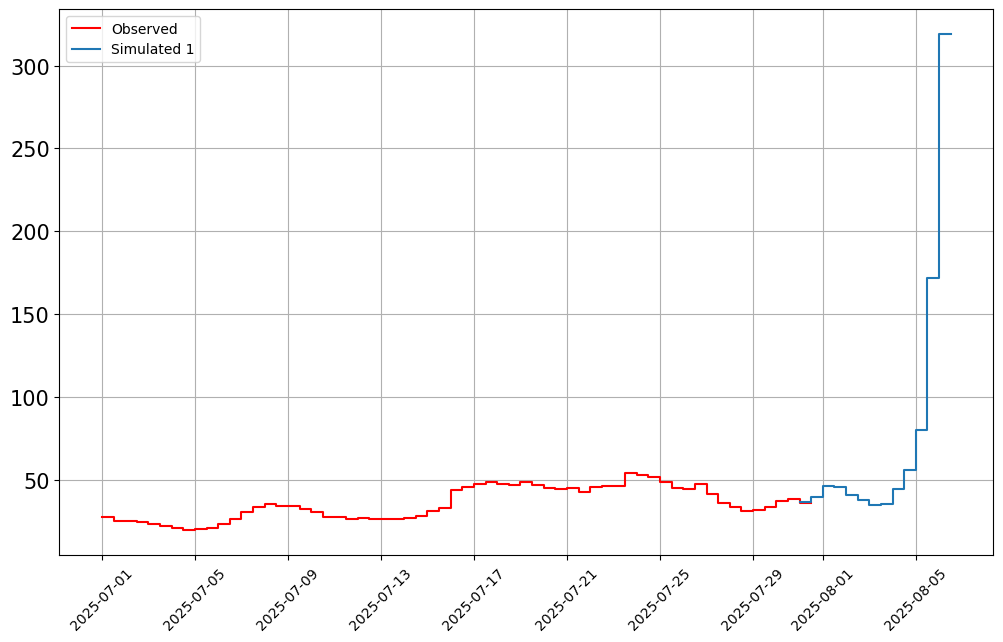

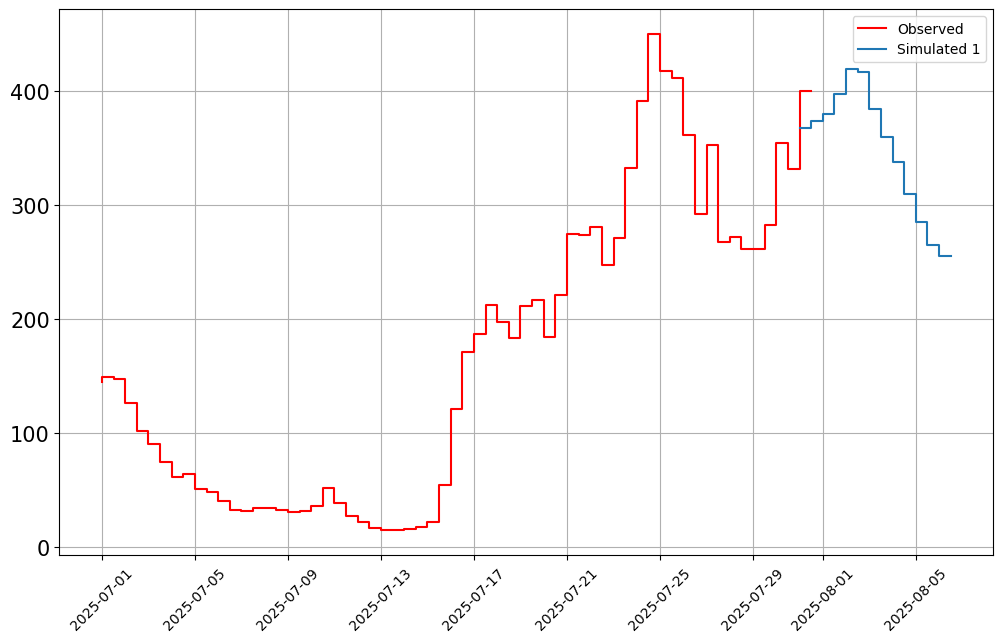

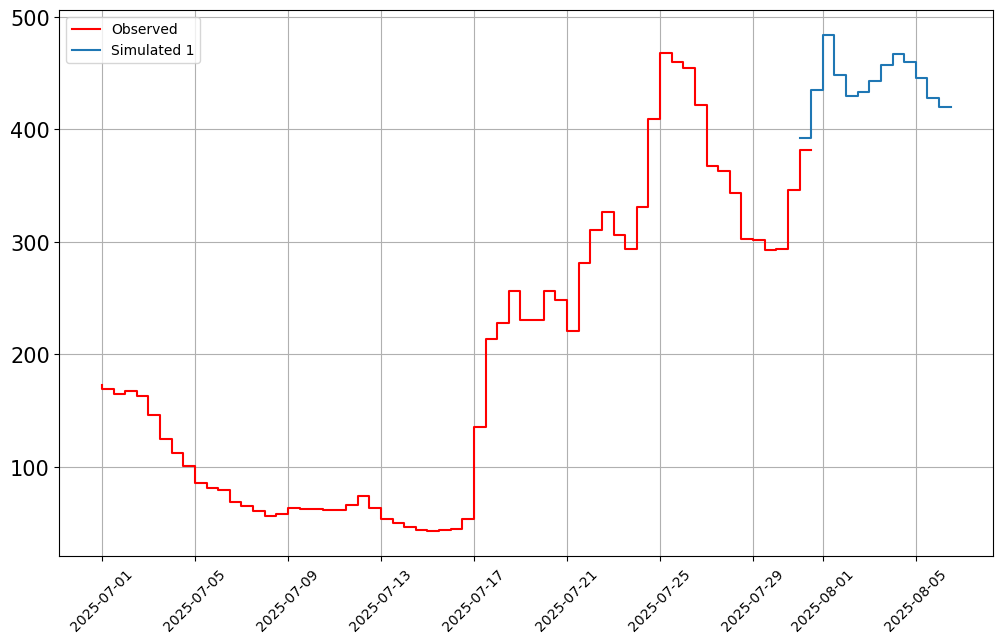

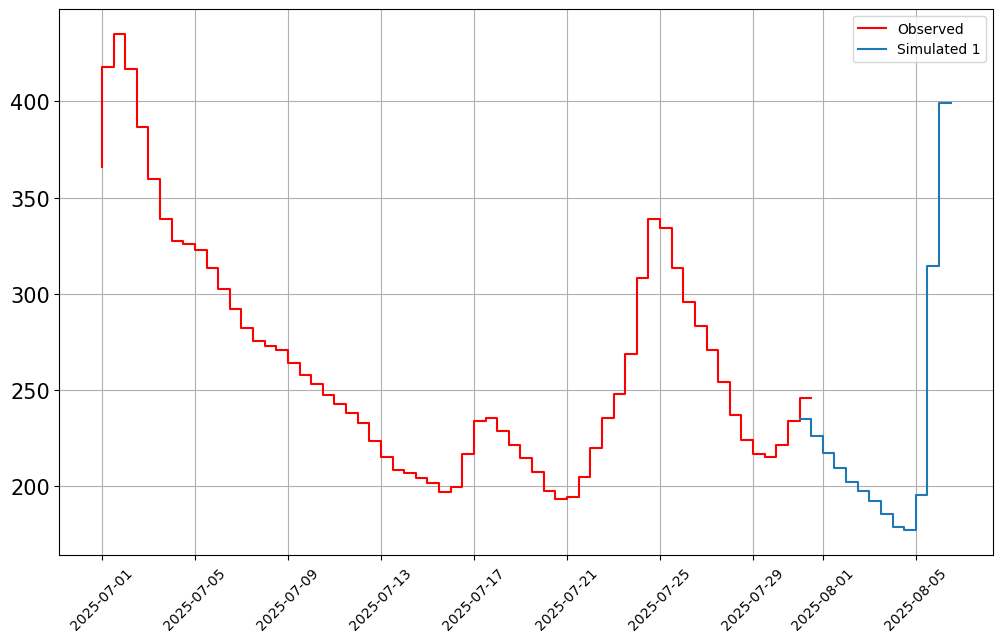

In [159]:
# Now we plot.

# Specify the Stations of importance.
stations_a = ["05AG006", "05BN012", "05AJ001", "05GG001"]
stations_b = ["05CK004", "05DF001", '05HG001', '05KD003']

visuals.plot(merged_df = merged.loc[:, [col for col in stations_a if col in merged.columns]],
             step = True, grid = True)

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 2. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 2. Number of legends provided is:  1. Applying Default legend names


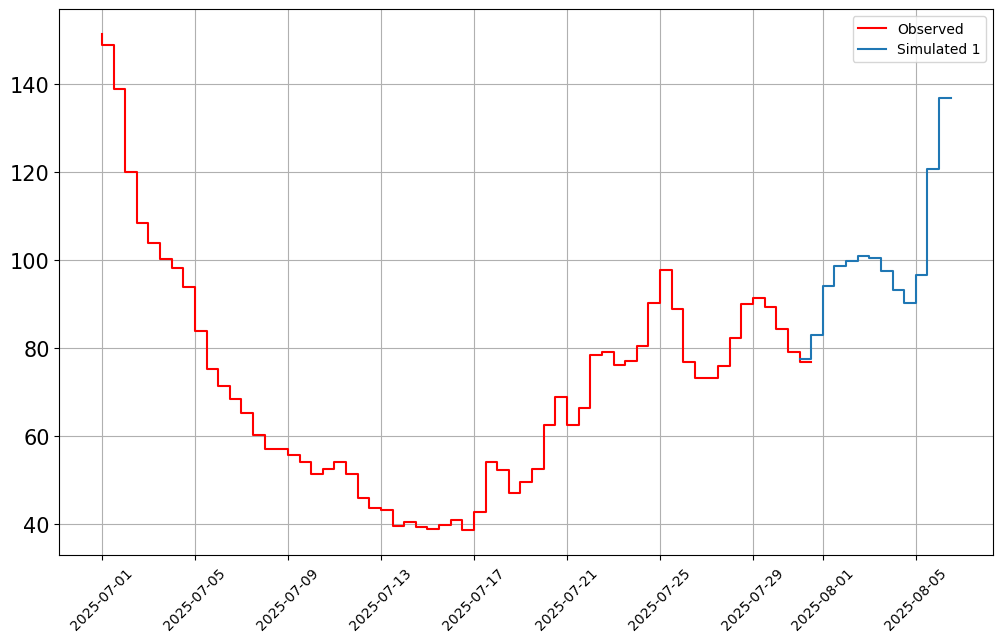

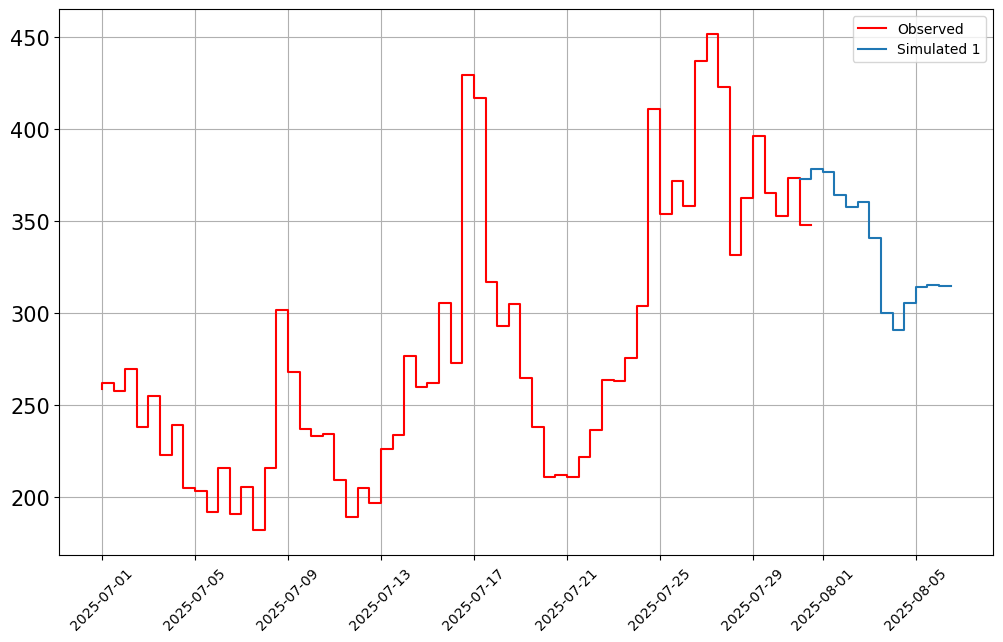

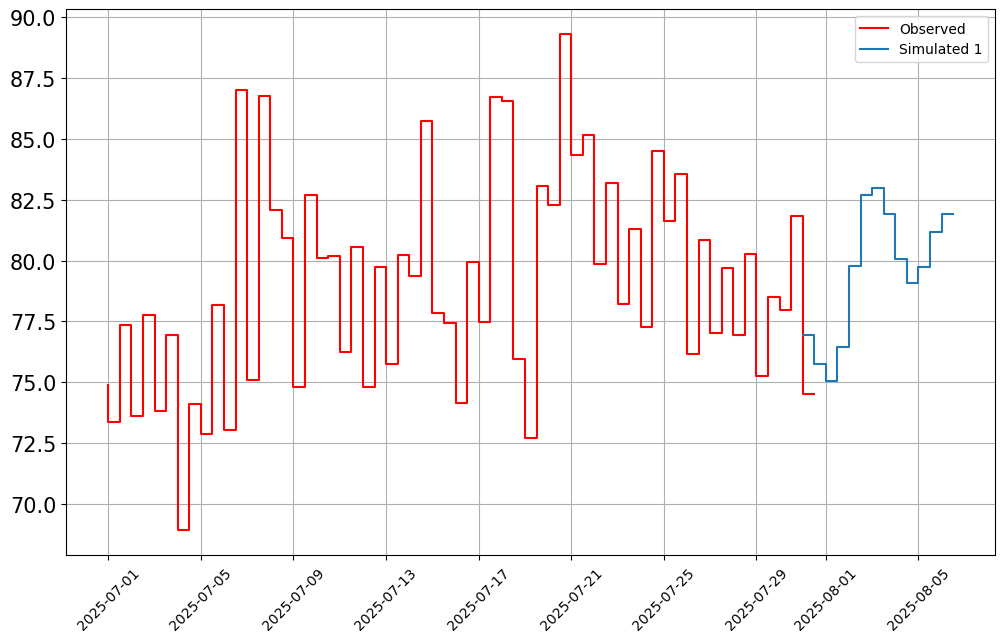

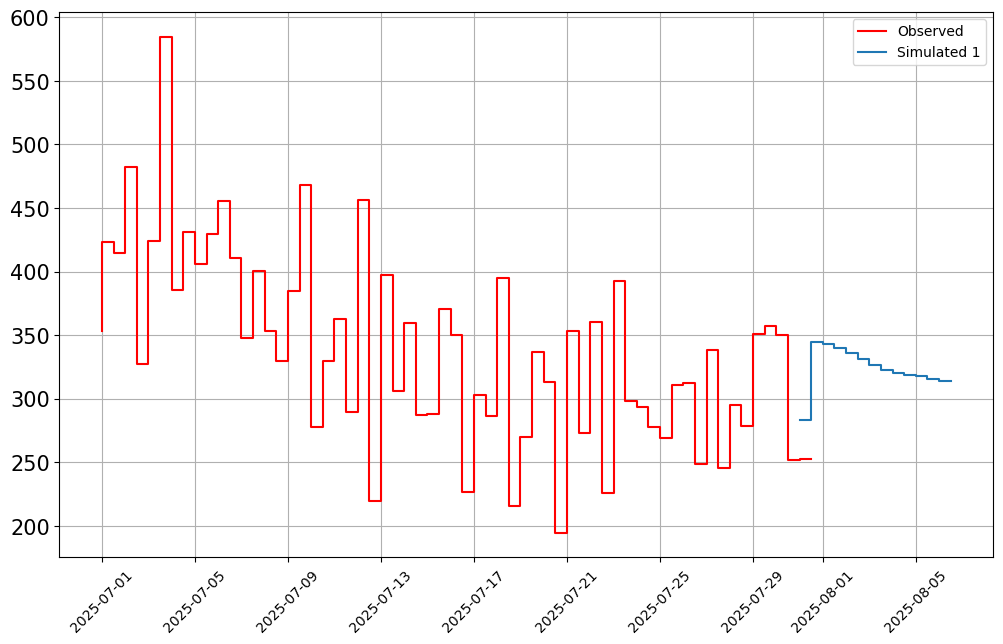

In [160]:
visuals.plot(merged_df = merged.loc[:, [col for col in stations_b if col in merged.columns]],
             step = True, grid = True)

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5


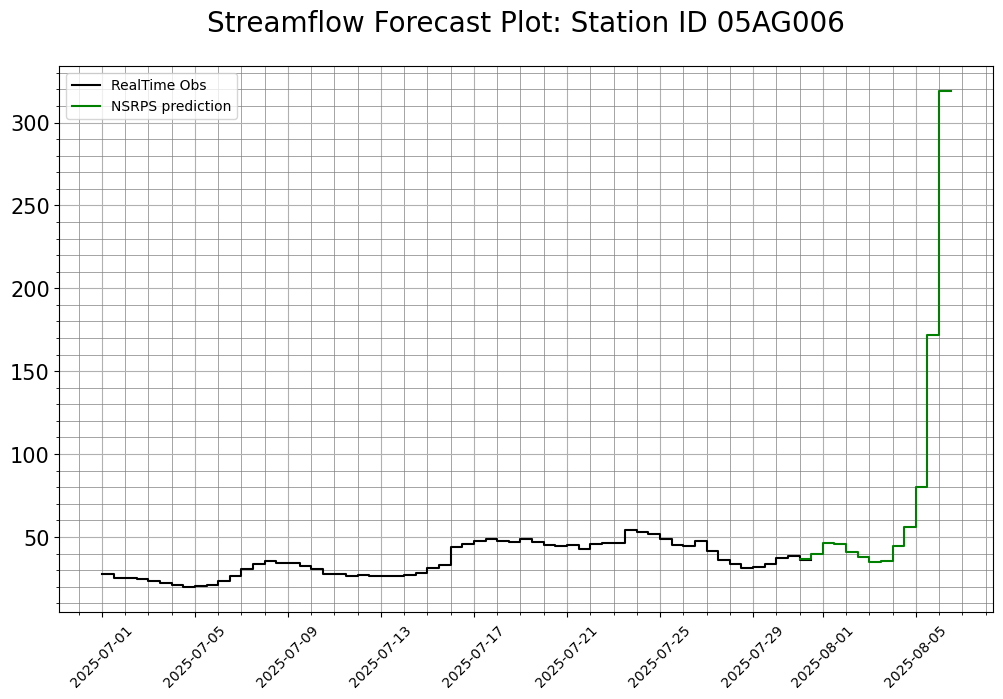

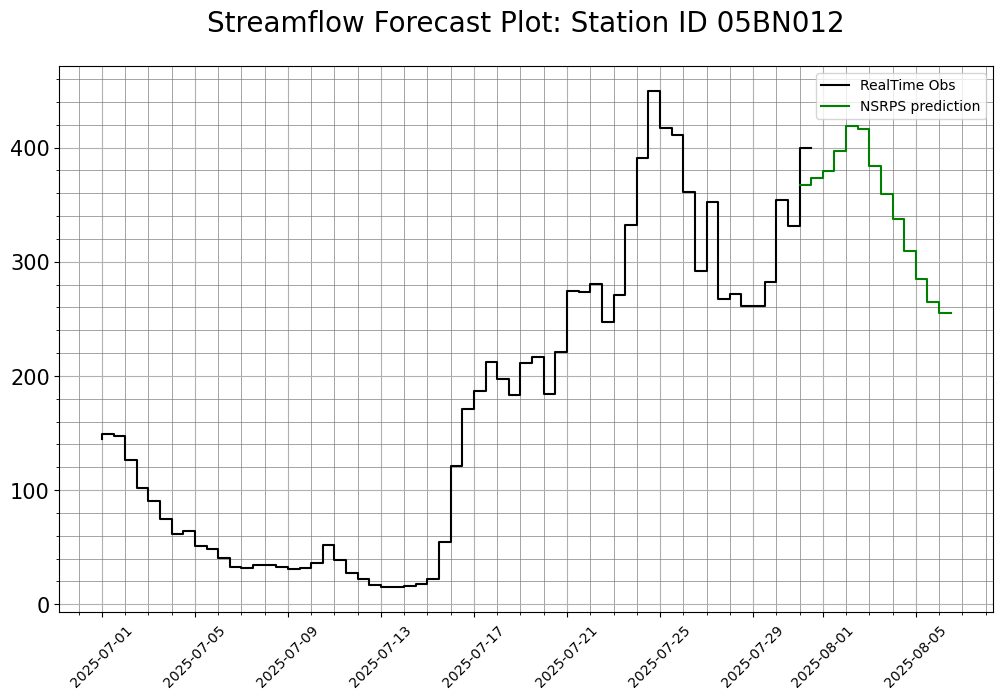

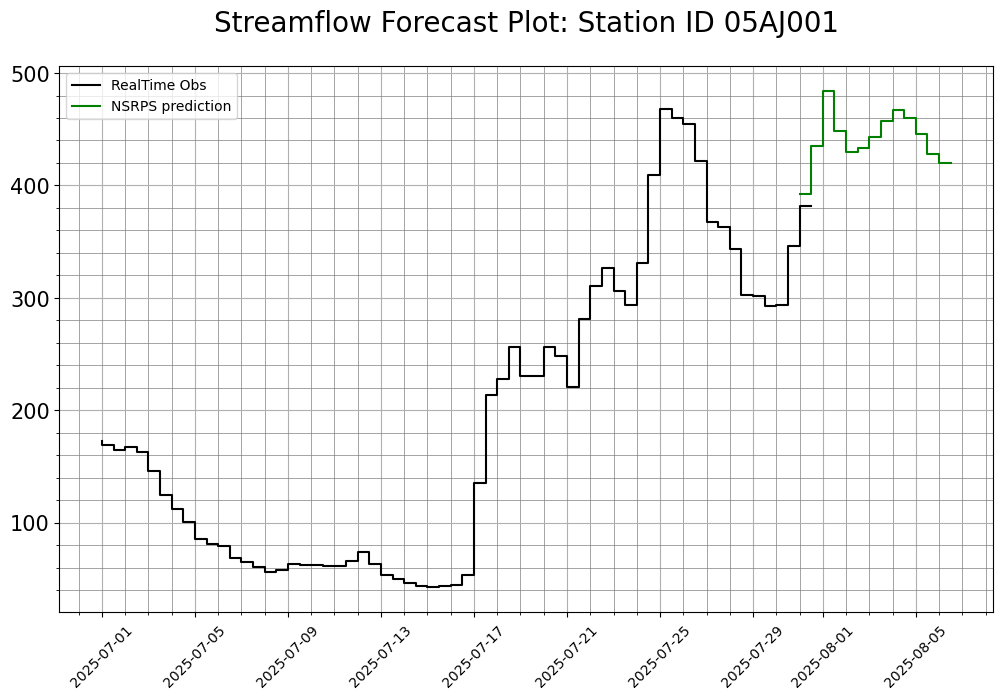

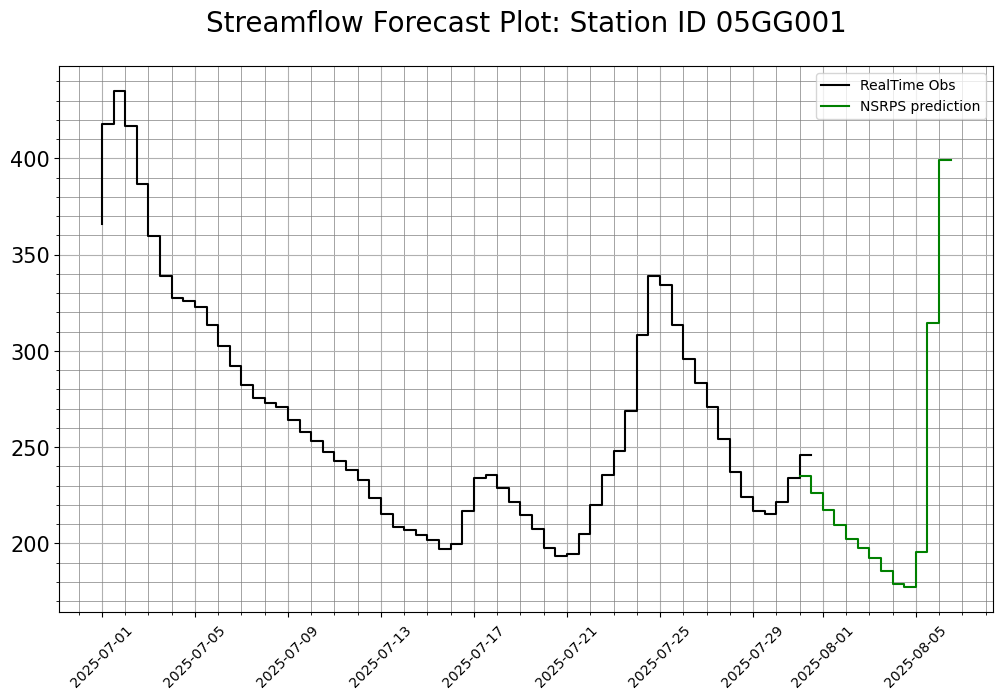

In [161]:
# Let us fill in the other plot features so that it looks exactly like we want.
visuals.plot(merged_df = merged.loc[:, [col for col in stations_a if col in merged.columns]], 
             step = True, grid = True, legend = ["RealTime Obs", "NSRPS prediction"],
             linestyles=['k-', 'g-'], minor_grid=True,
             title = [f"Streamflow Forecast Plot: Station ID {i}" for i in stations_a]
            )

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5


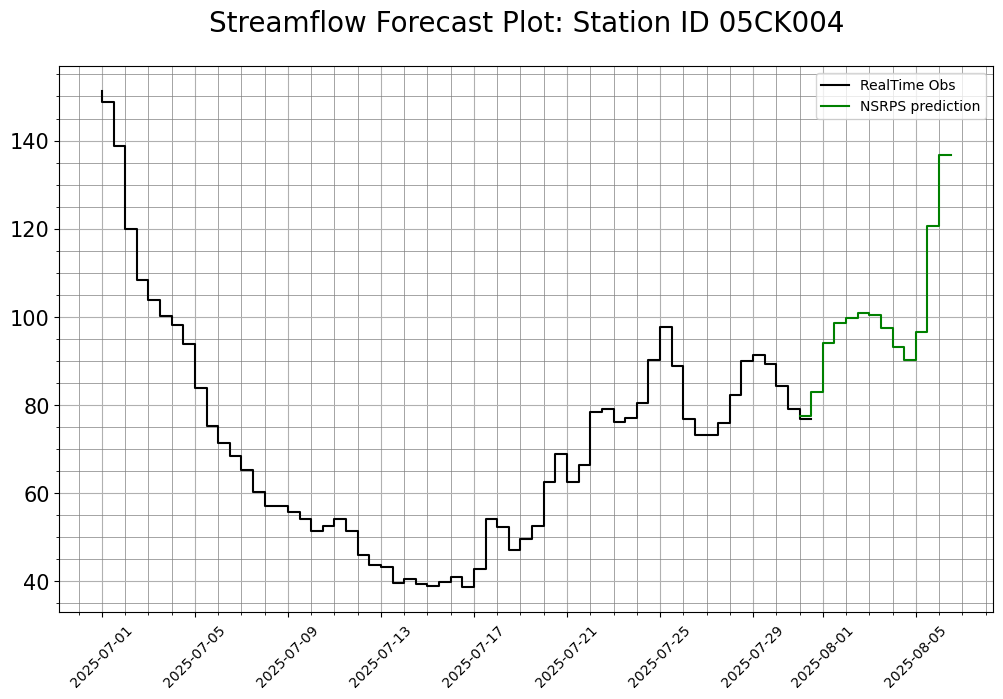

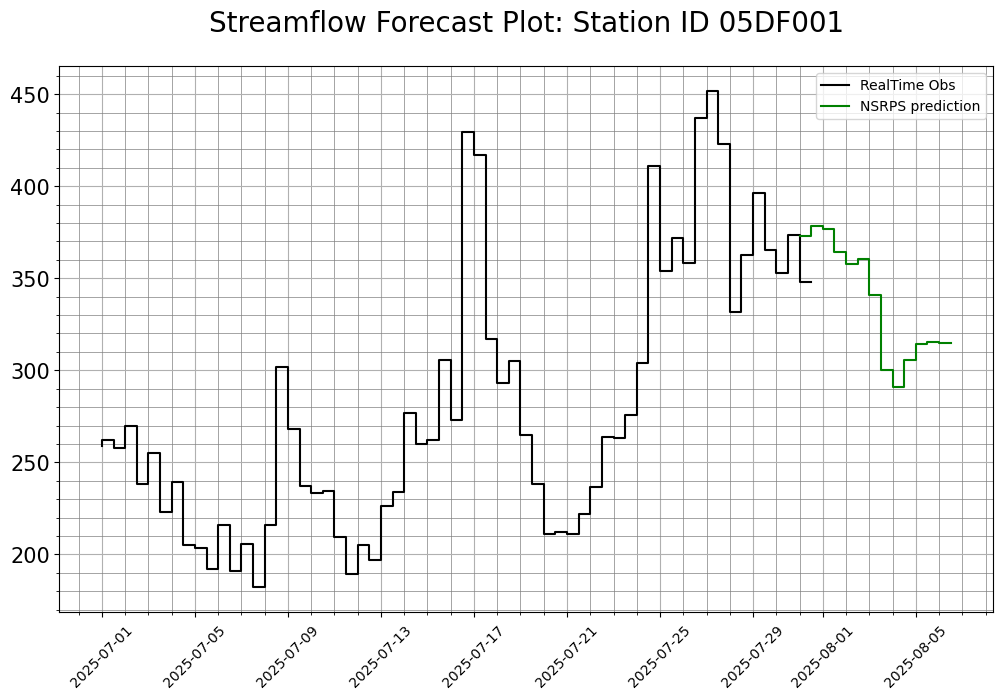

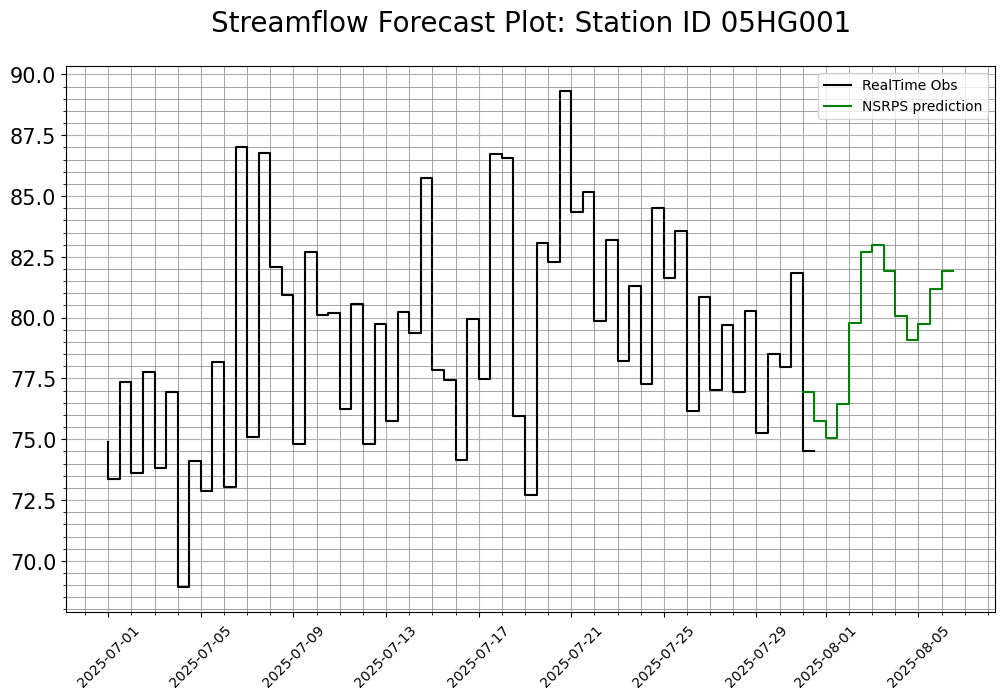

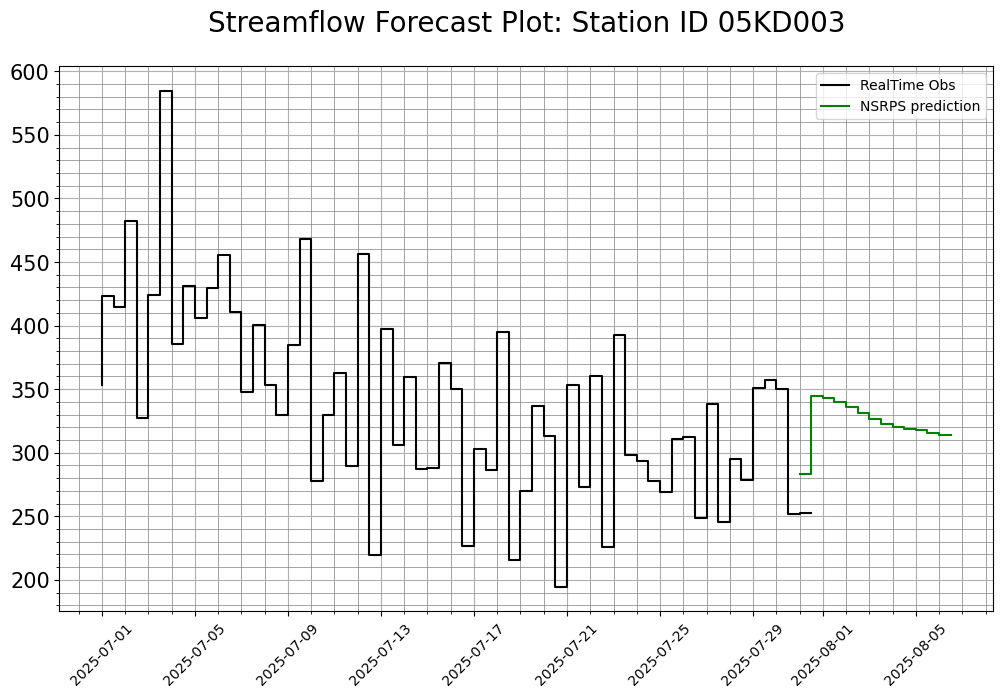

In [162]:
# Let us fill in the other plot features so that it looks exactly like we want.
visuals.plot(merged_df = merged.loc[:, [col for col in stations_b if col in merged.columns]], 
             step = True, grid = True, legend = ["RealTime Obs", "NSRPS prediction"],
             linestyles=['k-', 'g-'], minor_grid=True,
             title = [f"Streamflow Forecast Plot: Station ID {i}" for i in stations_b]
            )

### 4. Generate the Historical Data 

Let us now compare this data to the historical data for this time period over the last 45 years.

Again Using the MESH-Scrpts-Pylib library,

In [12]:
start_date = "1980-01-01"
end_date   = "2024-12-12"

station_ca = station_list
df_ca, meta_ca = gen_flow.fetch_hydrometric_data_ca(station_ca, start_date, end_date)
df_ca

Fetched daily‐mean for 05AA024 in 7.0s
Fetched daily‐mean for 05AC003 in 7.7s
Fetched daily‐mean for 05AD007 in 8.2s
Fetched daily‐mean for 05AG006 in 7.1s
Fetched daily‐mean for 05AJ001 in 8.6s
Fetched daily‐mean for 05BB001 in 8.7s
Fetched daily‐mean for 05BG010 in 6.3s
Fetched daily‐mean for 05BH004 in 8.6s
Fetched daily‐mean for 05BL024 in 8.4s
Fetched daily‐mean for 05BN012 in 7.9s
Fetched daily‐mean for 05CA009 in 8.3s
Fetched daily‐mean for 05CB001 in 7.7s
Fetched daily‐mean for 05CC002 in 7.6s
Fetched daily‐mean for 05CE001 in 8.3s
Fetched daily‐mean for 05CK004 in 7.6s
Fetched daily‐mean for 05DB006 in 7.9s
Fetched daily‐mean for 05DC001 in 4.5s
Fetched daily‐mean for 05DF001 in 8.4s
Fetched daily‐mean for 05EF001 in 8.8s
Fetched daily‐mean for 05FA001 in 8.1s
Fetched daily‐mean for 05FE004 in 7.6s
Fetched daily‐mean for 05GG001 in 7.7s
Fetched daily‐mean for 05HD039 in 8.0s
Fetched daily‐mean for 05HG001 in 7.6s
Fetched daily‐mean for 05KD003 in 7.8s
Fetched daily‐mean for 05

,05AA024,05AC003,05AD007,05AG006,05AJ001,05BB001,05BG010,05BH004,05BL024,05BN012,...,05DC001,05DF001,05EF001,05FA001,05FE004,05GG001,05HD039,05HG001,05KD003,05KJ001
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,3.75,None,5.65,None,56.0,9.28,None,39.599998,1.75,35.0,...,None,72.300003,102.0,0.16,0.672,56.599998,0.53,164.0,158.0,309.0
1980-01-02,3.62,None,5.5,None,54.799999,9.53,None,39.599998,1.55,36.599998,...,None,62.900002,93.5,0.16,0.648,65.199997,0.53,170.0,227.0,297.0
1980-01-03,3.5,None,5.38,None,51.0,9.31,None,39.200001,1.4,38.0,...,None,67.900002,86.400002,0.16,0.624,83.400002,0.52,173.0,228.0,282.0
1980-01-04,3.4,None,5.22,None,48.099998,8.68,None,39.700001,1.22,39.5,...,None,69.699997,94.0,0.16,0.599,95.099998,0.51,165.0,164.0,263.0
1980-01-05,3.28,None,5.05,None,45.700001,7.79,None,39.700001,1.08,37.0,...,None,86.699997,92.199997,0.16,0.575,96.5,0.5,169.0,178.0,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-08,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,263.0,301.0
2024-12-09,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,242.0,316.0
2024-12-10,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,278.0,328.0


Using our Library, let us now find the seasonal long term aggregation of the data i.e., aggregate all the 45 years into 1 year.

In [13]:
# Make sure each value of the dataframe is in fact numeric
for i in station_list:
    df_ca[i] = pd.to_numeric(df_ca[i], errors='coerce')
    
lt_mean = data.long_term_seasonal(df=df_ca, method = 'mean')
lt_max = data.long_term_seasonal(df=df_ca, method = 'max')
lt_min = data.long_term_seasonal(df=df_ca, method = 'min')
lt_median = data.long_term_seasonal(df=df_ca , method = 'median')

lt_q95 = data.long_term_seasonal(df=df_ca , method = 'Q95')
lt_q5 = data.long_term_seasonal(df=df_ca , method = 'q5')
lt_q75 = data.long_term_seasonal(df=df_ca , method = 'Q75')
lt_q25 = data.long_term_seasonal(df=df_ca , method = 'q25')

In [14]:
print("lt_mean:\n",lt_mean)
print("lt_median:\n",lt_median)
print("lt_Q75:\n",lt_q75)
print("lt_Q5:\n",lt_q5)

lt_mean:
         05AA024   05AC003    05AD007    05AG006    05AJ001    05BB001  \
jday                                                                    
1      9.785349  0.840725  21.336136  22.416585  75.006818   9.638409   
2      9.753023  0.858775  20.686364  22.014878  75.288636   9.677045   
3      9.803721  0.853525  20.268409  22.131707  74.288636   9.704318   
4      9.835814  0.875600  20.170227  22.080976  72.884091   9.715909   
5      9.784884  0.842767  19.852954  21.791219  72.363637   9.725454   
...         ...       ...        ...        ...        ...        ...   
362   10.682558  0.814146  21.859546  23.195238  72.709091  10.025682   
363   10.858372  0.837707  22.240000  22.950000  75.097728   9.933409   
364   10.508372  0.855732  22.536136  22.960714  76.890909   9.865455   
365   10.226512  0.829707  22.306591  22.814524  76.252273   9.794545   
366   10.543636  0.780700  25.080909  18.361000  69.200000  10.389091   

       05BG010    05BH004   05BL024    0

Observe that the indexes of the aggregations are integers from 1-366 and the Real-Time and NSRPS have datetime index. We have to convert the jday indexes to UTC datetime and then extract that 37 day time frame before we can plot the data.


In [15]:
# To do this I prepared a function
def prepare_dataframes(short_term_df, long_term_df, upper_bounds_dfs, lower_bounds_dfs):
    """
    Prepare climatology DataFrames expanded to match timestamps of short_term_df,
    with separate lists of upper and lower bound DataFrames.

    Args:
      short_term_df: DataFrame with datetime index.
      long_term_df: DataFrame indexed by jday (1-366) for median or central tendency.
      upper_bounds_dfs: List of DataFrames indexed by jday (1-366) for upper bounds (e.g. q95, max, q75).
      lower_bounds_dfs: List of DataFrames indexed by jday (1-366) for lower bounds (e.g. q5, min, q25).

    Returns:
      expanded_climatology: DataFrame with same index as short_term_df (median/centerline)
      expanded_upper_bounds: List of DataFrames with same index as short_term_df (upper bounds)
      expanded_lower_bounds: List of DataFrames with same index as short_term_df (lower bounds)
    """
    
    # Extract day of year (jday) for each timestamp in short_term_df
    jdays = short_term_df.index.dayofyear

    # Map median climatology values from jday to timestamps
    expanded_climatology = long_term_df.reindex(jdays).set_index(short_term_df.index)

    # Map each upper bound climatology similarly
    expanded_upper_bounds = []
    for upper_df in upper_bounds_dfs:
        expanded_upper = upper_df.reindex(jdays).set_index(short_term_df.index)
        expanded_upper_bounds.append(expanded_upper)

    # Map each lower bound climatology similarly
    expanded_lower_bounds = []
    for lower_df in lower_bounds_dfs:
        expanded_lower = lower_df.reindex(jdays).set_index(short_term_df.index)
        expanded_lower_bounds.append(expanded_lower)

    return expanded_climatology, expanded_upper_bounds, expanded_lower_bounds

In [16]:
median, upper, lower = prepare_dataframes(merged, lt_median, [lt_max, lt_q95, lt_q75], [lt_min, lt_q5, lt_q25])
# Recall - merged is the 37 day data that we are trying to compare to
# this should extract the corresponding 37 days with UTC datetime index.

In [147]:
print("median:\n",upper[0])

median:
                               05AA024    05AC003  05AD007  05AG006  05AJ001  \
2025-07-01 00:00:00+00:00  246.000000  18.299999    678.0    669.0   1770.0   
2025-07-01 12:00:00+00:00  246.000000  18.299999    678.0    669.0   1770.0   
2025-07-02 00:00:00+00:00  209.000000  17.299999    653.0    653.0   1330.0   
2025-07-02 12:00:00+00:00  209.000000  17.299999    653.0    653.0   1330.0   
2025-07-03 00:00:00+00:00  168.000000  17.400000    663.0    704.0   1060.0   
...                               ...        ...      ...      ...      ...   
2025-08-04 12:00:00+00:00   90.000000   5.650000    187.0    204.0    447.0   
2025-08-05 00:00:00+00:00   89.900002   4.820000    181.0    201.0    416.0   
2025-08-05 12:00:00+00:00   89.900002   4.820000    181.0    201.0    416.0   
2025-08-06 00:00:00+00:00   89.599998   4.810000    180.0    194.0    374.0   
2025-08-06 12:00:00+00:00   89.599998   4.810000    180.0    194.0    374.0   

                           05BB001    05BG

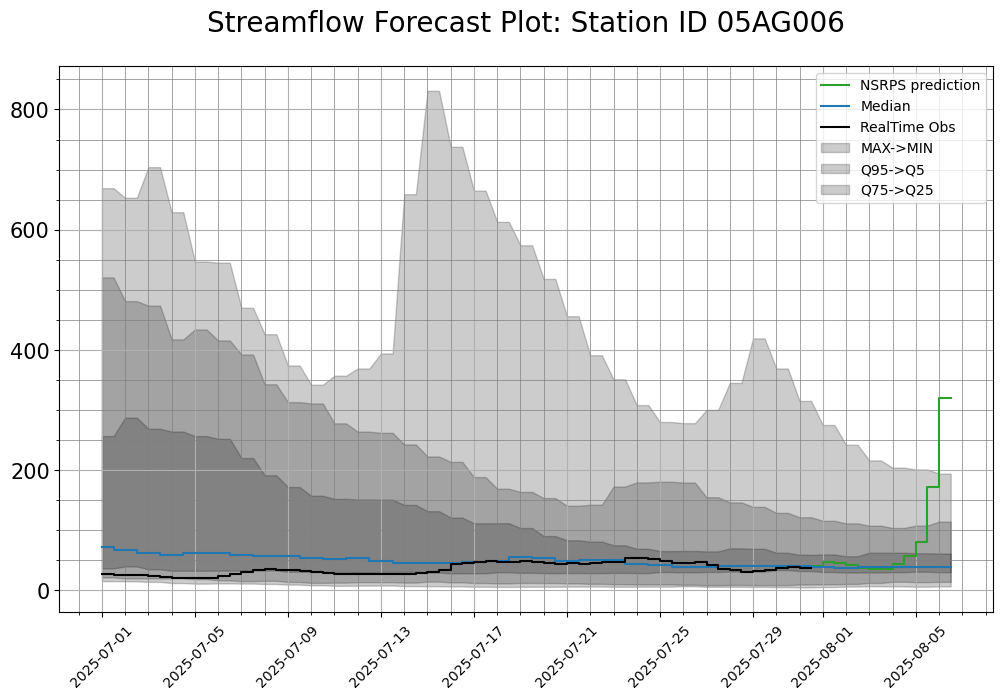

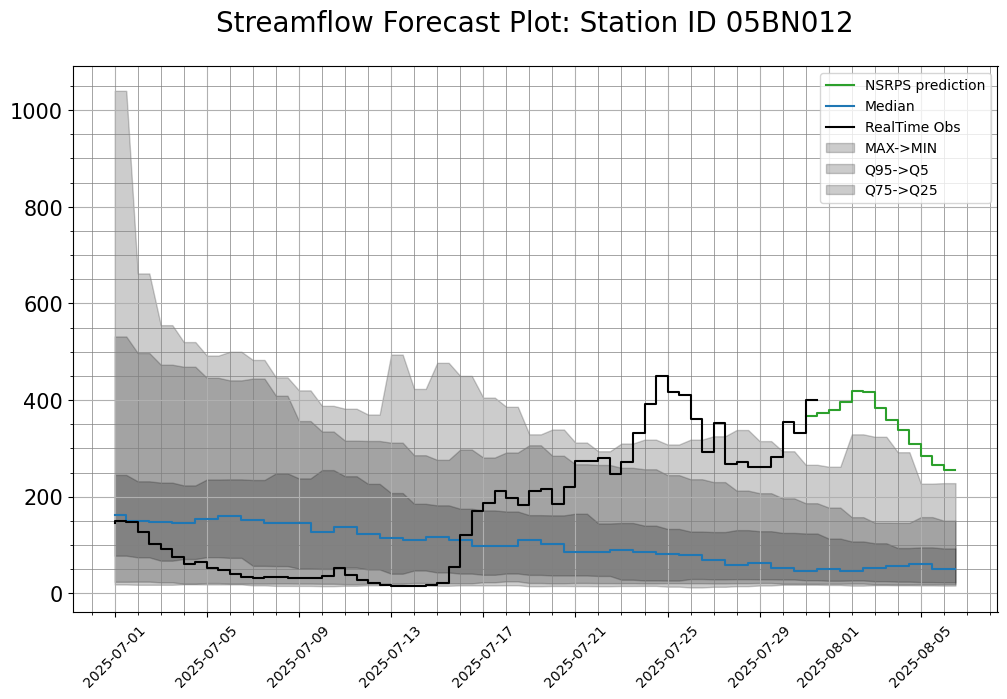

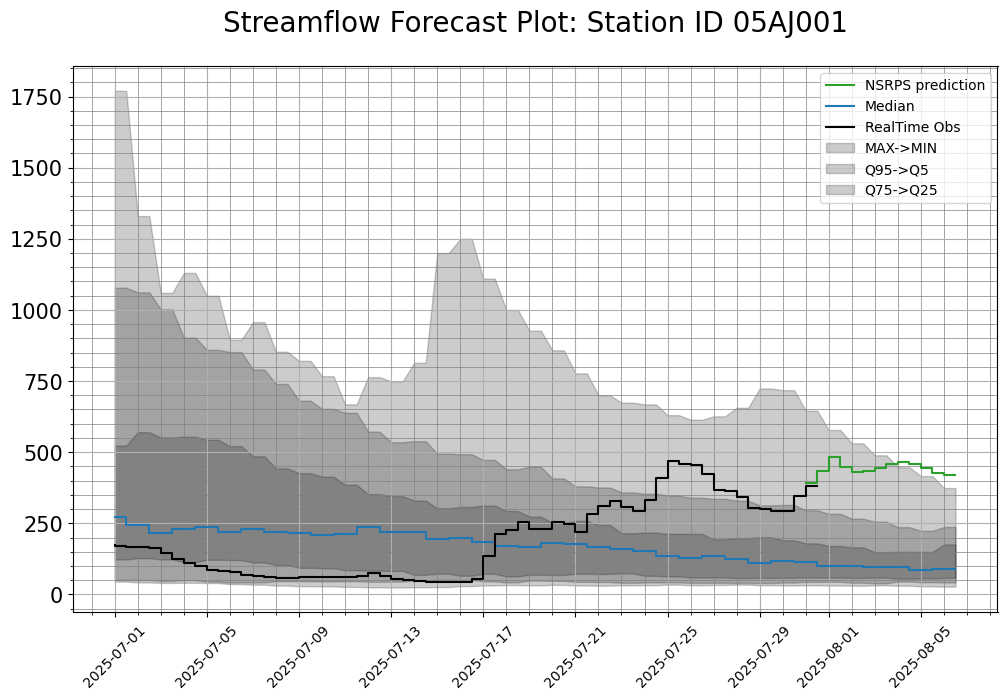

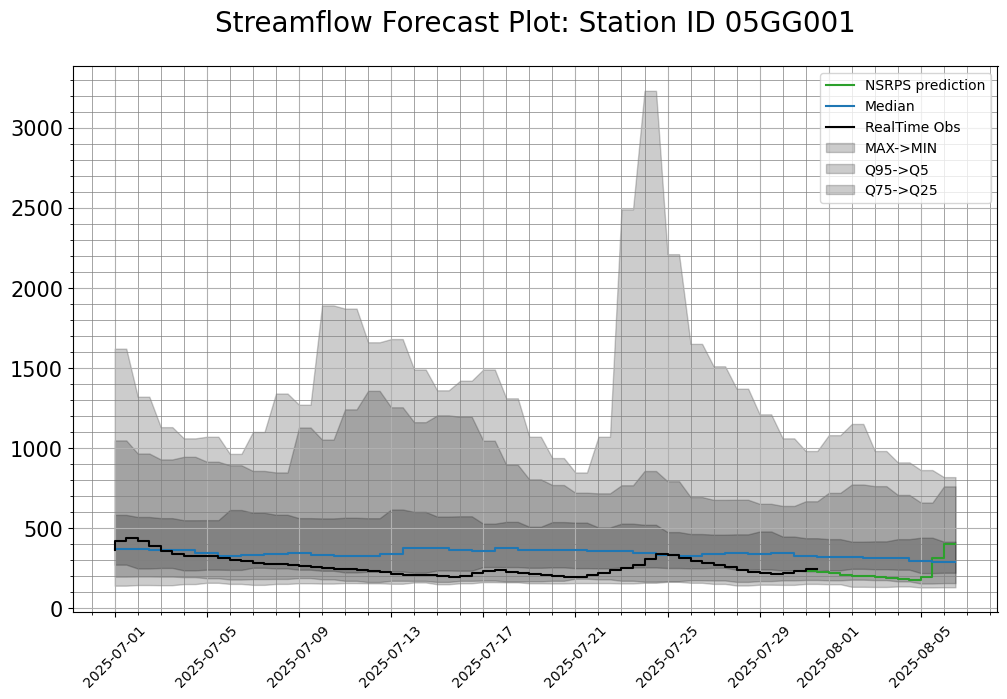

In [163]:
# Now we plot
visuals.bounded_plot(lines=merged.loc[:, [(s, "QOMEAS") for s in stations_a if (s, "QOMEAS") in merged.columns]], 
                     upper_bounds=[df.loc[:, [col for col in stations_a if col in df.columns]] for df in upper], 
                     lower_bounds=[df.loc[:, [col for col in stations_a if col in df.columns]] for df in lower], 
                     extra_lines=[merged.loc[:, [(s, "QOSIM") for s in stations_a if (s, "QOSIM") in merged.columns]], median.loc[:, [col for col in stations_a if col in df.columns]]],
                     grid = True, minor_grid =True, step = True, legend = ["NSRPS prediction","Median", "RealTime Obs"], bound_legend= ["MAX->MIN","Q95->Q5","Q75->Q25"],
                     linestyles=("(0.173, 0.628, 0.173)-","(0.122, 0.467, 0.706)-", "(0.00, 0.00, 0.00)-"), transparency = [0.2], title = [f"Streamflow Forecast Plot: Station ID {i}" for i in stations_a]
                    )

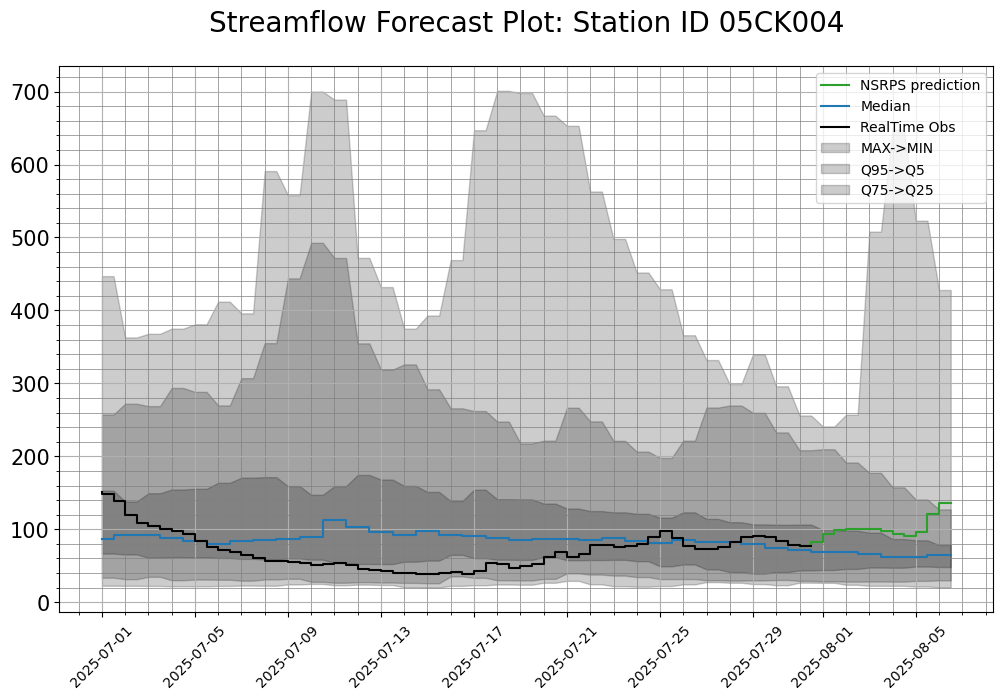

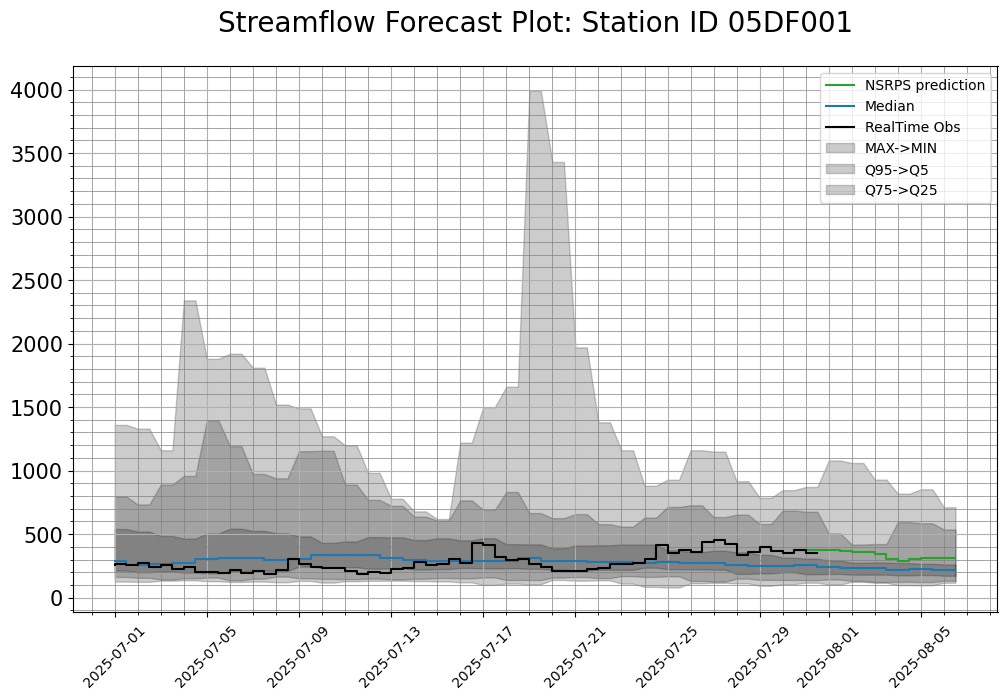

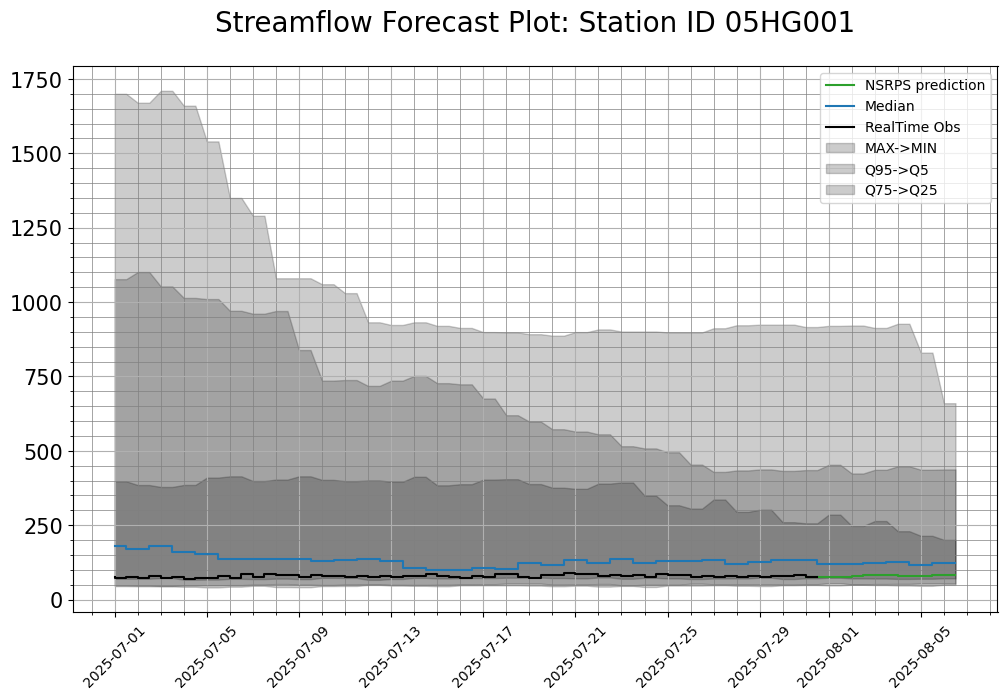

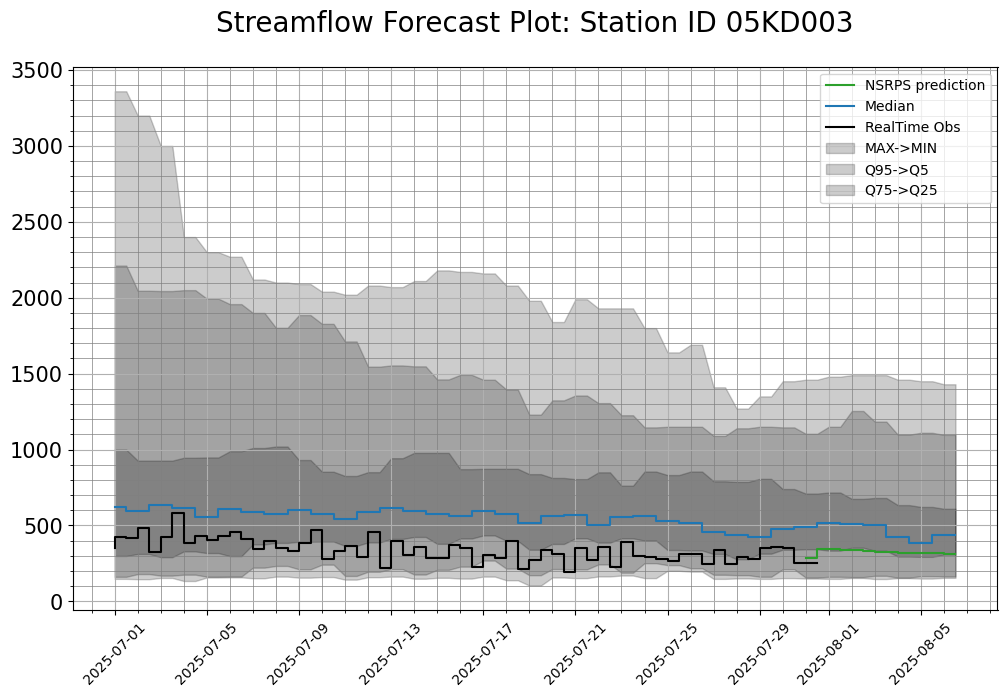

In [165]:
# Now we plot
visuals.bounded_plot(lines=merged.loc[:, [(s, "QOMEAS") for s in stations_b if (s, "QOMEAS") in merged.columns]], 
                     upper_bounds=[df.loc[:, [col for col in stations_b if col in df.columns]] for df in upper], 
                     lower_bounds=[df.loc[:, [col for col in stations_b if col in df.columns]] for df in lower], 
                     extra_lines=[merged.loc[:, [(s, "QOSIM") for s in stations_b if (s, "QOSIM") in merged.columns]], median.loc[:, [col for col in stations_b if col in df.columns]]],
                     grid = True, minor_grid =True, step = True, legend = ["NSRPS prediction","Median", "RealTime Obs"], bound_legend= ["MAX->MIN","Q95->Q5","Q75->Q25"],
                     linestyles=("(0.173, 0.628, 0.173)-","(0.122, 0.467, 0.706)-", "(0.00, 0.00, 0.00)-"), transparency = [0.2], title = [f"Streamflow Forecast Plot: Station ID {i}" for i in stations_b]
                    )

## Forecast Error

Using multiple days of saved observed and forecasted streamflow data we want to generate the rate of forecast error. That is we want to determine how accurate the forecast is when compared to the actual predicted value for that day. 

In [20]:
from pathlib import Path

# Directory containing the CSV files
dir_path = Path("../../../postprocessinglib/forecast/NSRPS_PRED")

# Find and sort all files starting with "merged" and ending with ".csv"
merged_files = sorted(dir_path.glob("merged*.csv"))

# Create a dictionary with keys as csv_1, csv_2, ...
DATA = {}
for i, file in enumerate(merged_files, start=1):
    df = pd.read_csv(file, header=[0, 1], index_col=0, parse_dates=True)
    DATA[f"csv_{i}"] = df
    
obs = df_rt.copy()
    
for key in DATA:
    df = DATA[key]
    
    # Extract only the QOSIM columns
    qosim_cols = df.loc[:, df.columns.get_level_values(1) == 'QOSIM']
    
    # Drop rows where any of the QOSIM values are NaN, but retain all columns
    df = df[df[qosim_cols.columns].notna().all(axis=1)]
    
    # Create a list to hold the new column names
    new_columns = []
    
    # Loop through the MultiIndex and adjust the column names
    for station, label in df.columns:
        if label == 'QOMEAS':
            new_columns.append(station)  # Just the station name for 'QOMEAS'
        elif label == 'QOSIM':
            new_columns.append(f"{station}_sim")  # Add '_sim' for 'QOSIM'
    
    # Apply the new column names
    df.columns = new_columns
    
    # Replace station values in DATA[key] with the corresponding values from obs
    for station_sim in df.columns:
        # Check if the column is a station (i.e., no '_sim' suffix)
        if '_sim' not in station_sim:
            # Extract the station name (this is the column name without '_sim')
            station = station_sim
            
            # Check if the station exists in the 'obs' DataFrame
            if station in obs.columns:
                # Replace the values in the column with corresponding values from 'obs'
                df.loc[:, station_sim] = obs[station]
                
    new_index = [i * 12 for i in range(len(df))]
    df.index = new_index
    
    # Store the modified dataframe back into DATA
    DATA[key] = df


In [21]:
print(DATA["csv_1"])
# print(DATA["csv_2"])
# print(DATA["csv_3"])

       05AA024  05AA024_sim   05AC003  05AC003_sim    05AD007  05AD007_sim  \
0    66.896528    40.443394  3.144097     3.020033  27.625000    38.726326   
12   66.777778    31.851374  2.991319     2.824759  26.338889    54.049076   
24   66.806250    31.176400  3.550347     2.613257  27.029861    64.492180   
36   66.640972    30.332200  3.420625     2.424642  26.483333    71.598790   
48   66.559028    29.407976  3.160417     2.248391  25.893750    69.430170   
60   66.501389    28.316813  2.923056     2.073036  25.975694    56.159760   
72   66.393750    27.403070  3.268472     1.925203  25.083333    45.062305   
84   66.401389    26.321901  3.315208     1.795834  24.379167    40.513794   
96   66.529861    25.418737  3.525556     1.684133  24.757639    39.369816   
108  66.797222    24.504843  4.240764     1.574160  27.039583    38.051140   
120  60.161806    23.594065  5.714583     1.466695  26.209722    36.420082   
132  56.346528    22.562174  5.394653     1.352908  37.816667   

In [22]:
import pandas as pd
from collections import defaultdict
from natsort import natsorted
import numpy as np 

error_data = defaultdict(dict)

# Create a dictionary to hold the mean observed values at each index for each station
station_mean_obs = defaultdict(lambda: defaultdict(list))

# Loop through each CSV and gather the QOMEAS values for each station at each index (0, 12, 24, ..., 144)
for key, df in DATA.items():
    stations = df.columns.get_level_values(0).unique()
    
    for station in stations:
        obs_col = station  # After renaming, 'QOMEAS' columns are just the station name
        if obs_col in df.columns:
            obs = df[obs_col]
            # For each station, store the 'QOMEAS' value for each index in all CSVs
            for idx in range(0, obs.index[-1]+1, 12):  # 0, 12, 24, 36, ..., 144
                station_mean_obs[station][idx].append(obs.loc[idx])

# print(station_mean_obs['05AA024'])
# Now calculate the mean for each station at each index (0, 12, 24, ..., 144)
mean_station_obs = {station: {idx: np.nanmean(values) for idx, values in idx_vals.items()}
                    for station, idx_vals in station_mean_obs.items()}

# Loop through each CSV and compute the percent error for each station at every index
for key, df in DATA.items():
    stations = df.columns.get_level_values(0).unique()
    
    for station in stations:
        obs_col = station  # Again, 'QOMEAS' columns are just the station name
        sim_col = f"{station}_sim"  # 'QOSIM' columns have the '_sim' suffix
        
        if obs_col in df.columns and sim_col in df.columns:
            obs = df[obs_col]
            sim = df[sim_col]
            
            # Loop over every index to calculate percent error
            percent_errors = []
#             print(obs.index[-1])
            for idx in range(0, obs.index[-1]+1, 12):  # 0, 12, 24, 36, ..., 144
                # Get the mean of the observed values at this index across all CSVs for this station
                mean_obs = mean_station_obs[station][idx]
                
                # Calculate percent error for this index using the mean observed value for this index
                percent_error = ((sim.loc[idx] - obs.loc[idx]) / mean_obs) * 100
                
                # Append the result
                percent_errors.append(percent_error)
            
            # Store the percent error for this station and CSV file
            error_data[station][key] = pd.Series(percent_errors, index=[i * 12 for i in range(len(percent_errors))])

# Build DataFrame from the nested dict containing percent error
final_error_df = pd.DataFrame({
    (station, key): series
    for station, csv_dict in error_data.items()
    for key, series in csv_dict.items()
    if key in natsorted(csv_dict.keys())[:16]  # <-- This line filters the first 16 keys
})

final_error_df.columns = pd.MultiIndex.from_tuples(final_error_df.columns)

# Optionally, print the final error dataframe to check
print(final_error_df)


        05AA024                                                             \
          csv_1       csv_2       csv_3       csv_4       csv_5      csv_6   
0    -65.299864  -66.979672  -67.752815  -69.788295  -75.307870 -78.378338   
12   -88.550888  -90.098949  -91.989953  -95.454048 -104.423443 -89.797453   
24   -91.527740  -92.948988  -94.946335  -98.383629  -90.854202 -81.358413   
36   -95.928874  -97.666285 -100.154534 -103.852716  -83.800160 -66.745954   
48   -99.231204 -101.416374 -103.289085 -107.658642  -67.736377 -57.712070   
60   -98.083359  -99.552368 -102.089315 -106.883679  -54.911840 -43.182982   
72  -102.261715 -104.508666 -106.968087  -94.157193  -42.966595 -34.494696   
84  -108.137832 -110.325318 -113.654767  -88.804564  -33.712832 -33.421136   
96  -111.707516 -114.244650  -97.848363  -70.996098  -30.935709 -29.866158   
108 -118.066939 -100.262852  -92.557994  -62.394682  -24.874479 -17.858998   
120 -106.905852  -96.870421  -79.179655  -53.109532  -10.942051 

In [23]:
method = ['q10', 'q25', 'q50', 'q75', 'q90' ]
combined_cols = []
combined_data = []
df_stats = data.stat_aggregate(df=final_error_df, method="mean")
# Loop through each method and apply stat_aggregate
for method in method:
    temp_df = data.stat_aggregate(df=final_error_df, method=method)
    for station in df_stats.columns.get_level_values(0).unique():
            temp_df_cols = temp_df[station]
            # Important fix: Make sure temp_df_cols is DataFrame not Series
            if isinstance(temp_df_cols, pd.Series):
                temp_df_cols = temp_df_cols.to_frame()

            for col in temp_df_cols.columns:
                combined_cols.append((station, col))

            combined_data.append(temp_df_cols)

# Now merge everything
final_df = pd.concat(combined_data, axis=1)
final_df.columns = pd.MultiIndex.from_tuples(combined_cols)
final_df = final_df.loc[:, ~final_df.columns.duplicated()]
sorted_stations = natsorted(final_df.T.index.get_level_values(0).unique())
new_blocks = [
    final_df.T[final_df.T.index.get_level_values(0) == station].T
    for station in sorted_stations
]
final_df = pd.concat(new_blocks, axis=1)
final_df.columns = pd.MultiIndex.from_tuples(final_df.columns)
df_stats = final_df
df_stats

05AA024                                                 05AC003  \
            Q10        Q25        Q50        Q75        Q90         Q10   
0    -72.548082 -67.172957 -41.379753  -2.914942   8.221156  -14.366812   
12   -93.722000 -89.872827 -47.989802  -3.260084   5.267096  -48.698695   
24   -93.947661 -91.022587 -37.651683  -0.831046  11.305805  -66.394417   
36   -98.910410 -86.832339 -33.143869   8.770660  19.936356  -55.003127   
48  -102.352730 -75.610083 -31.406653  13.720857  25.719807  -40.562784   
60  -100.820841 -65.704720 -23.600386   8.827614  26.790075  -46.366414   
72  -103.385190 -55.764245 -15.137899   1.271428  29.257296  -47.492521   
84  -109.231575 -47.485765 -10.717048   9.272234  32.088861  -57.802301   
96  -104.777939 -40.950806  -8.587316  14.850011  34.014094  -64.575845   
108  -96.410423 -34.254530  -6.505115  15.669301  36.266566 -100.068942   
120  -88.025038 -21.483922  -4.313582  16.593997  38.784693  -85.836962   
132  -76.791736 -15.778445  -0.413581  17.614364  40.641915  -41.548585   
144  -67.118503 -15.573781   2.554870  18.608495  45.148266  -23.358404   

                                                    ...    05KD003             \
           Q25         Q50         Q75         Q90  ...        Q10        Q25   
0    -1.771046    4.995388   13.182034   29.447276  ... -40.252668 -21.899061   
12  -15.227536    2.822980   34.013147   68.178708  ... -20.873861 -15.295521   
24  -28.435662   -2.070606   51.290535   67.997770  ... -19.441420 -12.758334   
36  -21.264572    5.603248   33.014492  111.392310  ... -16.821918  -2.034159   
48  -30.599597    7.883008   57.480190  134.105140  ... -25.438381  -1.059942   
60  -31.806340   19.638400   94.251499  176.550915  ... -25.801903 -20.689314   
72  -39.378691   24.196878   99.349214  315.190639  ... -21.055127  -9.774728   
84  -22.208738    4.511466  151.828847  343.246068  ... -13.573978   2.288290   
96  -21.906424   18.906332  225.110462  341.906964  ... -15.763587 -10.058754   
108   0.718546   54.754387  226.417196  328.088199  ... -17.150288 -11.322307   
120   5.923501  141.704404  240.905517  302.370759  ... -11.432989  -6.554248   
132  -6.772597  217.544655  239.573589  372.840625  ... -15.553701  -4.602124   
144  33.308461  189.542611  307.886855  434.092087  ... -15.496722 -14.721303   

                                       05KJ001                        \
          Q50        Q75        Q90        Q10        Q25        Q50   
0    3.921601  23.068893  38.996061   4.118089   5.672686  10.063524   
12   0.726284   7.510285  20.425212  -1.246039   8.864123  10.315258   
24   3.058288  11.664862  23.630632  -0.591607   1.141589  10.379094   
36   6.186062  20.415354  28.874711  -1.207747   4.180520   6.840039   
48   7.473835  26.432738  29.432176   4.435566   6.898891  13.364239   
60  -2.199549  10.954548  18.720917   3.975217   9.829125  14.120021   
72  -6.705560   5.146310  31.066691   6.233139   9.801643  15.439301   
84   7.868373  14.529506  33.786841   8.319023  13.262947  16.825094   
96   8.455934  12.939710  25.055051  13.585754  14.741020  19.528819   
108  3.200247  11.174300  15.978753  11.093648  13.949095  16.654211   
120 -0.243697  11.108091  26.658279   5.357861   7.281523  20.559905   
132  6.714163  15.855467  34.780975  11.361733  13.034306  20.486063   
144  7.034080  16.114223  24.653000  14.773155  17.596632  20.986290   

                           
           Q75        Q90  
0    11.846175  12.377424  
12   18.311080  22.297418  
24   18.349746  25.265652  
36   21.288124  25.184760  
48   16.589111  22.299542  
60   19.055388  23.135021  
72   20.288294  24.948612  
84   21.924044  25.952432  
96   22.879670  24.609856  
108  20.209550  23.670297  
120  22.833127  26.647200  
132  23.753037  28.699310  
144  24.368521  28.571037  

[13 rows x 130 columns]

Number of linestyles provided is less than the minimum required. Number of Lines : 3. Number of linestyles provided is:  1. Defaulting to solid lines (-)


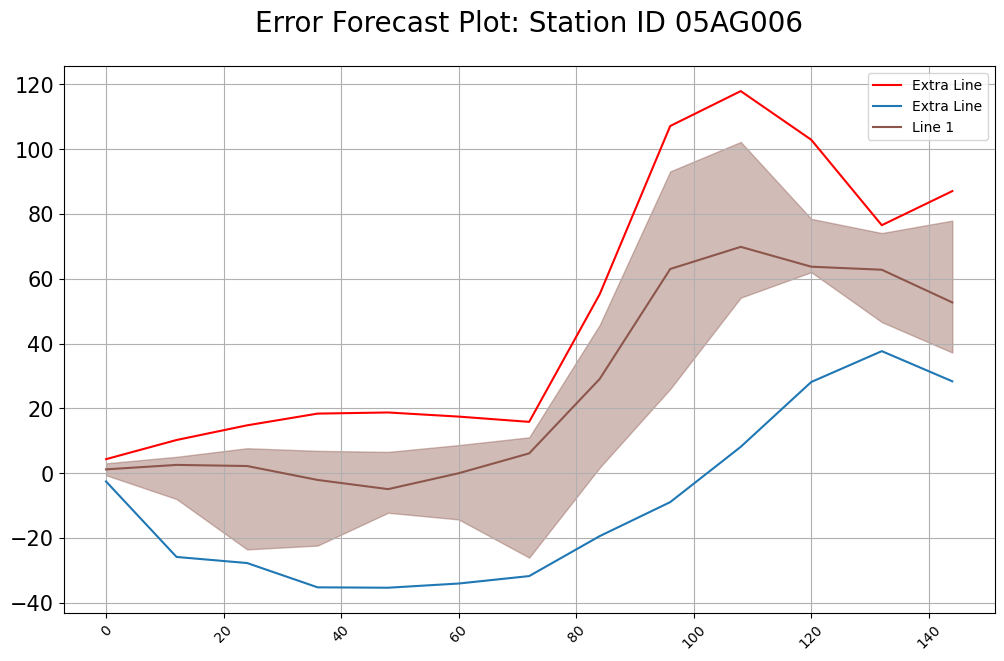

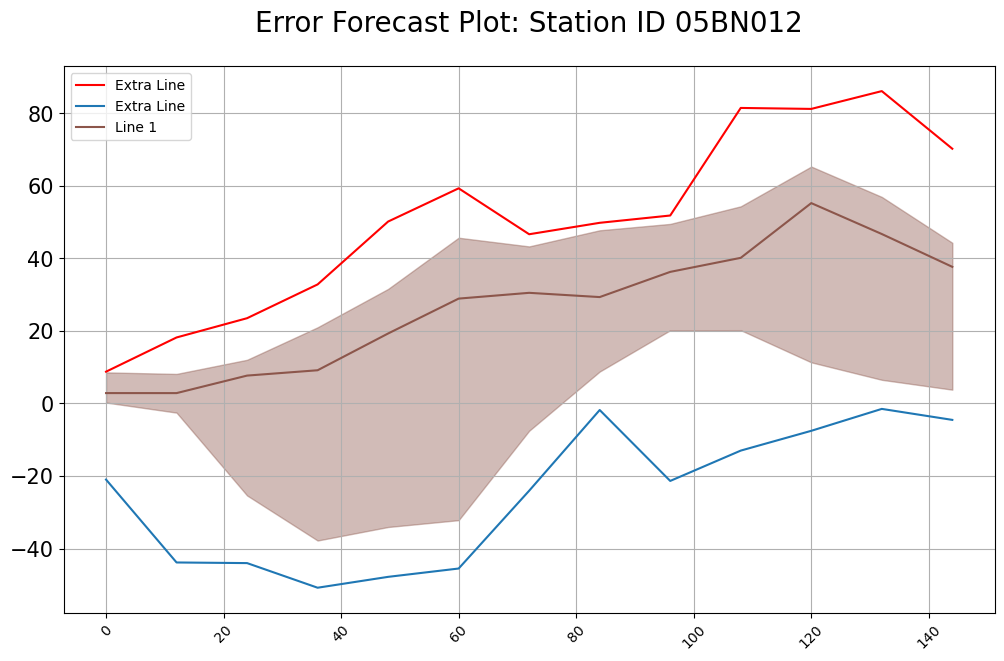

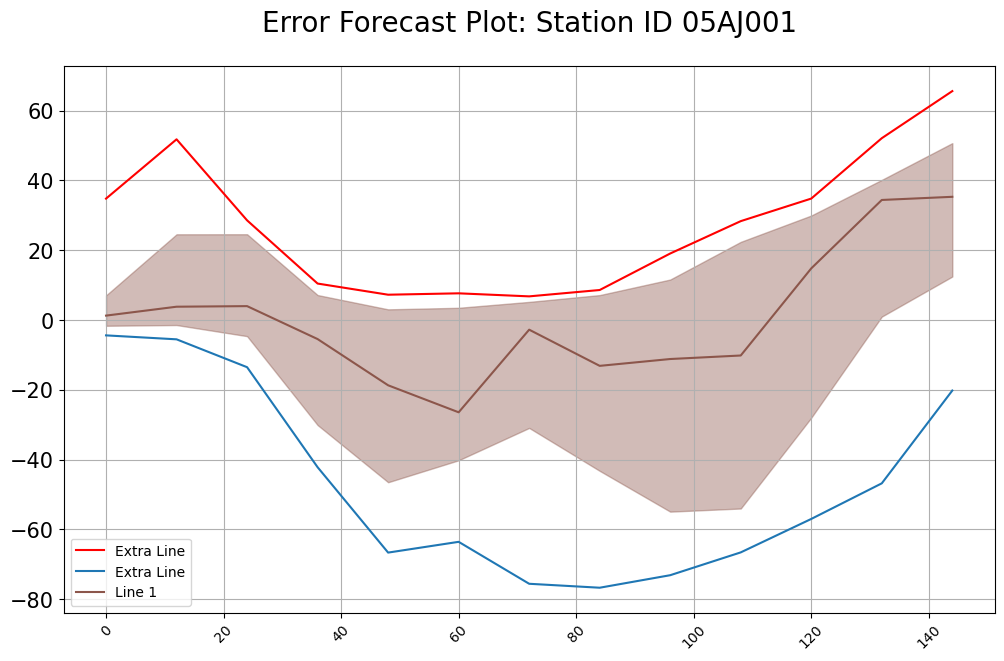

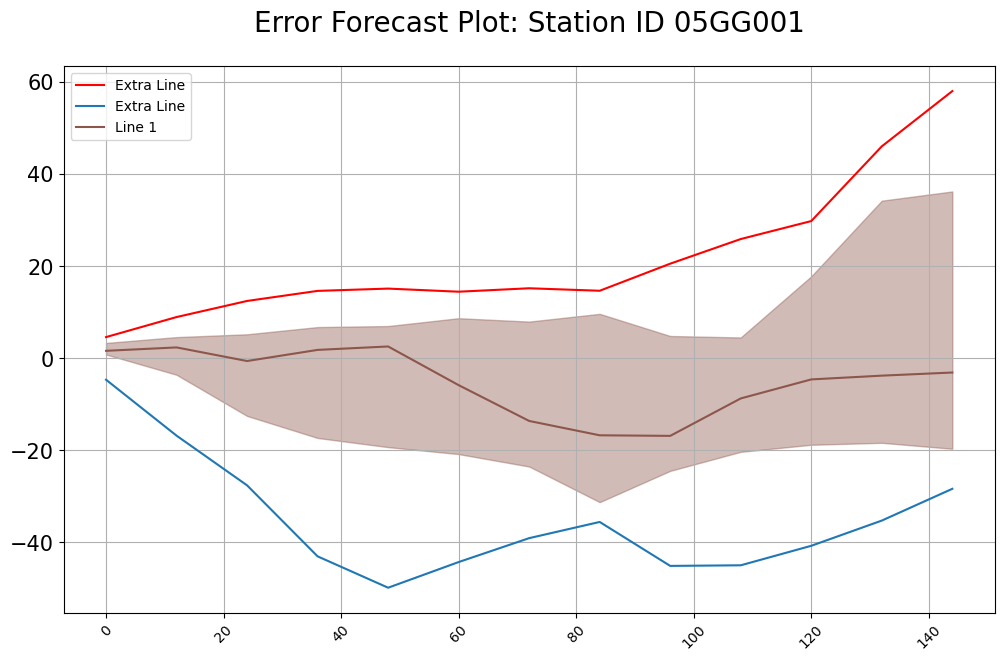

In [166]:
visuals.bounded_plot(
    lines = df_stats.loc[:, [(s, "Q50") for s in stations_a if (s, "Q50") in df_stats.columns]],
    upper_bounds = df_stats.loc[:, [(s, "Q75") for s in stations_a if (s, "Q75") in df_stats.columns]],
    lower_bounds = df_stats.loc[:, [(s, "Q25") for s in stations_a if (s, "Q25") in df_stats.columns]],
    extra_lines = [
        df_stats.loc[:, [(s, "Q90") for s in stations_a if (s, "Q90") in df_stats.columns]],
        df_stats.loc[:, [(s, "Q10") for s in stations_a if (s, "Q10") in df_stats.columns]]
    ],
    grid = True,
    title = [f"Error Forecast Plot: Station ID {i}" for i in stations_a],
#     save = True,
#     save_as = [f"{i}" for i in stations_a]
)


Number of linestyles provided is less than the minimum required. Number of Lines : 3. Number of linestyles provided is:  1. Defaulting to solid lines (-)


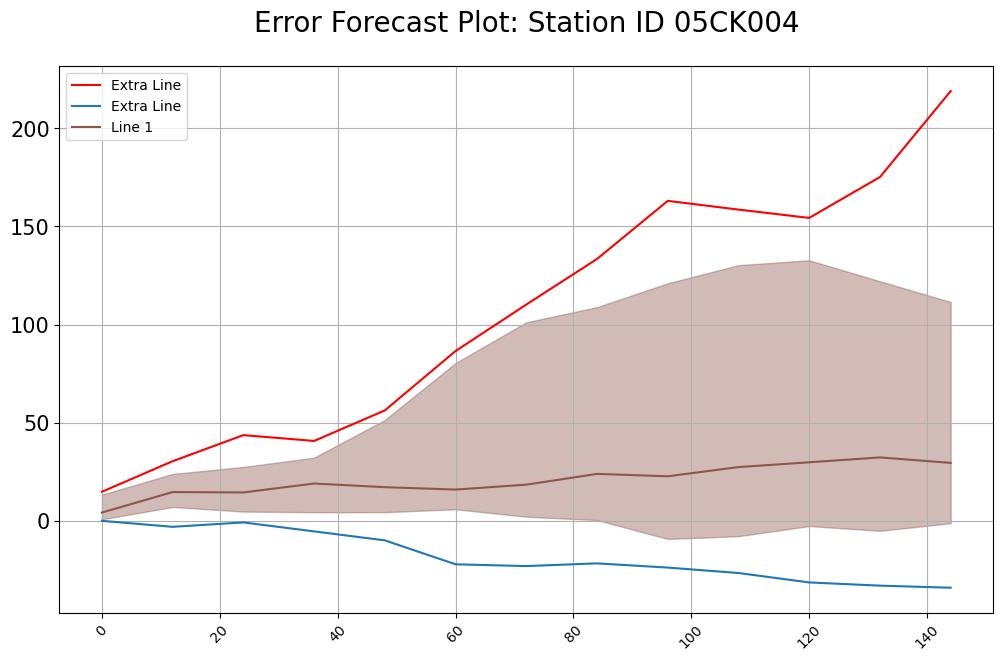

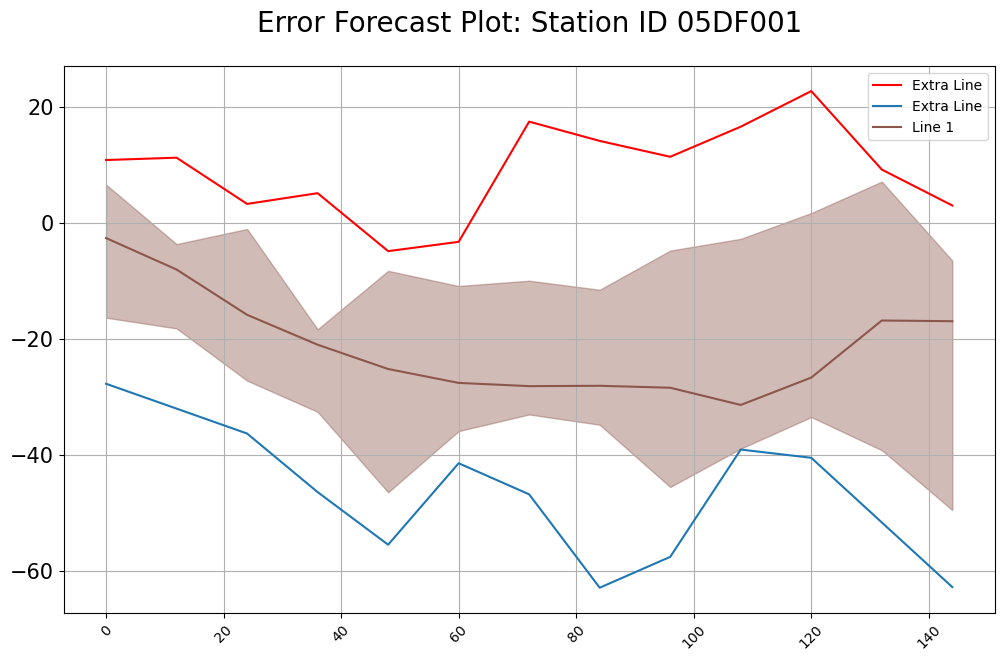

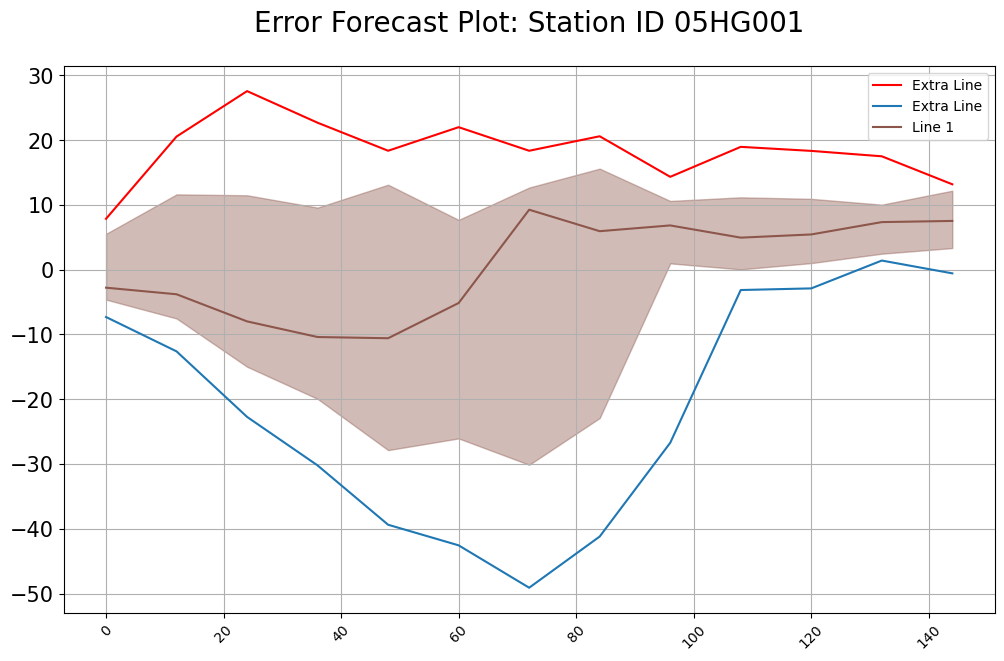

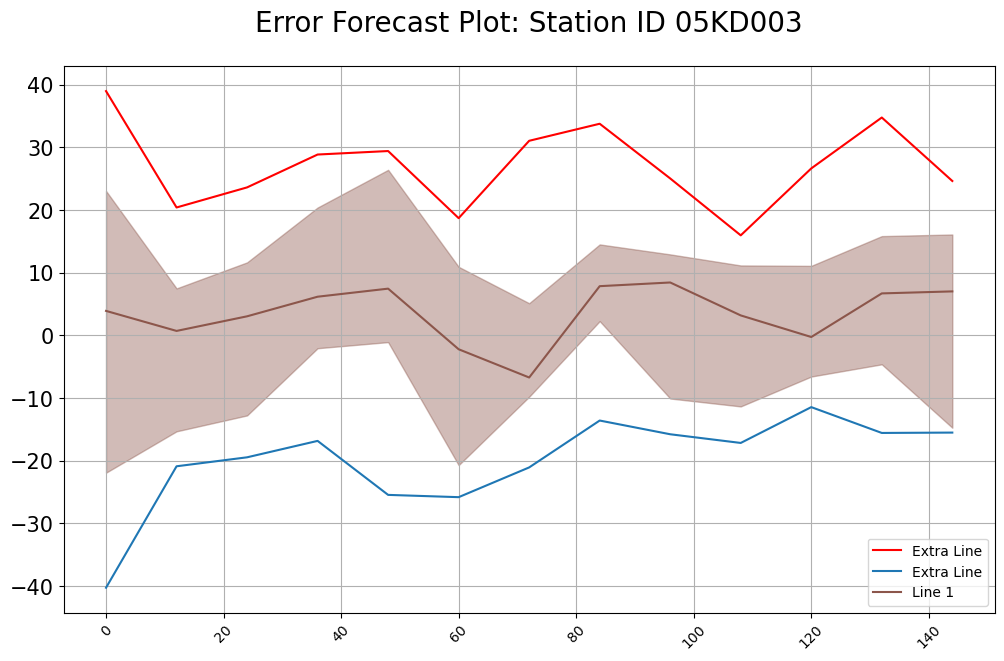

In [211]:
visuals.bounded_plot(
    lines = df_stats.loc[:, [(s, "Q50") for s in stations_b if (s, "Q50") in df_stats.columns]],
    upper_bounds = df_stats.loc[:, [(s, "Q75") for s in stations_b if (s, "Q75") in df_stats.columns]],
    lower_bounds = df_stats.loc[:, [(s, "Q25") for s in stations_b if (s, "Q25") in df_stats.columns]],
    extra_lines = [
        df_stats.loc[:, [(s, "Q90") for s in stations_b if (s, "Q90") in df_stats.columns]],
        df_stats.loc[:, [(s, "Q10") for s in stations_b if (s, "Q10") in df_stats.columns]]
    ],
    grid = True,
    title = [f"Error Forecast Plot: Station ID {i}" for i in stations_b],
#     save = True,
#     save_as = [f"{i}" for i in stations_a]
)